# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [22]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


# API for students

In [23]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [24]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [25]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,0.025417,0.071822,0.042589,0.025417,4553.6,0.080156,2.3941,0.025417,0.032332,64.985,1.0935,0.11386,0.032332,0.41355,0.51773,0.080156,1.6874,0.096384,4.8078,0.513970,0.032332,191.43,1.9067,0.27259,0.11386,0.79532,4.2437,0.58152,0.144830,0.46499,0.11263,0.144830,114.28,49.297,0.1816,0.76501,75.71,0.10579,0.134580,0.98325,0.35389,0.52447,0.87853,0.98679,3649.0,0.141650,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,-0.027621,-0.17588,0.011274,-0.027621,3138.4,0.1163,4.7595,-0.027621,-0.012744,62.936,1.1507,-0.015089,-0.010996,0.077482,0.76855,0.13433,-0.068354,1.5195,4.8829,0.092599,-0.012744,25.965,14.057,-0.071818,-0.015089,2.199,5.4972,0.82161,-0.006962,0.07737,0.18686,-0.006962,110.01,47.079,-0.063774,1.8576,61.792,-0.067146,-0.030980,3.1671,0.15704,0.071138,2.2971,2.4557,38823.0,-0.018502,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,0.039264,0.11336,0.056198,0.039264,2400,0.15209,2.2418,0.039264,0.032526,24.253,0.82243,0.03838,0.025278,0.35323,0.39457,0.13247,0.33465,0.42733,4.5257,0.345420,0.032526,110.23,3.3111,0.086042,0.03838,1.2333,4.6327,0.49426,0.031794,0.096624,0.21903,0.031794,153.78,129.530,0.38042,1.3334,25.528,0.009805,0.008122,1.2152,0.34637,0.30201,0.86161,1.0793,6565.2,0.049940,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,0.058164,1.0319,0.186870,0.058164,260.91,1.399,17.741,0.058164,0.137840,60.675,0.94921,0.059565,0.123980,0.14969,0.61173,1.2953,1.451,1.3709,4.7352,-0.990460,0.137840,50.118,7.2828,1.0567,0.059565,0.5458,?,0.61173,0.141160,8.4323,0.02309,0.141160,109.59,48.911,0.74585,9.4355,62.37,0.038873,0.092122,10.68,0.056366,0.13731,1.537,1.537,29652.0,0.027178,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,0.017035,0.002484,0.040636,0.001007,3455.9,0.10562,2.0116,0.001007,0.000780,104.830,0.97245,0.017035,0.000768,0.002107,0.10133,0.10559,1.0629,0.26137,4.0033,0.381750,0.012043,112.33,3.2495,2.6513,-0.02597,1.2921,15.89,0.5128,-0.020100,0.017617,0.2418,0.013184,147.36,42.531,0.002675,0.38879,102.76,-0.034462,-0.026672,1.0637,0.40562,0.30774,1.0672,1.0882,1241.0,-0.020100,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [26]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.
So choose one (explain why !) and do the following.

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import os

def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    
    df_for_test = X.set_index('Id')



    def apply_transformation_for_test(df_t):
    
        import pickle
        
        with open("knn_impute_model.pkl", 'rb') as file:
            knn_impute_model = pickle.load(file)
        
        with open("min_max_model.pkl", 'rb') as file:
            min_max_model_model = pickle.load(file)
        
        df_t = df_t.apply(pd.to_numeric , errors = 'coerce') 
        col_selected = [i for i in df_t.columns if i not in ["X24","X37","X45","X60","Bankrupt"]]
        X_val_test = df_t.loc[:, col_selected]
    
        X_log_test = np.sign(X_val_test) * np.log(np.abs(X_val_test)+0.01)       
        X_test_dummy = None
        X_test_dummy = X_log_test.copy()
        
        X_test_dummy['X21_ismissing'] = np.where(X_log_test['X21'].isna(), 1, 0)
        X_test_dummy['X27_ismissing'] = np.where(X_log_test['X27'].isna(), 1, 0)
        X_test_dummy = X_test_dummy[['X21_ismissing','X27_ismissing']]
        X_log_test_scaled = pd.DataFrame(min_max_model_model.transform(X_log_test),index=X_log_test.index,columns = X_log_test.columns)
        X_log_test_imputed = pd.DataFrame(knn_impute_model.transform(X_log_test_scaled),index=X_log_test_scaled.index,columns = X_log_test_scaled.columns)

        X_test = pd.merge(  X_log_test_imputed, X_test_dummy, left_index=True, right_index=True)
    
        X_tran = X_test
    
        
        return X_tran 




    def model_prediction(X_test_for_model):
    
        
        import pickle
        
        with open("randomforest_model.pkl", 'rb') as file:
            randomforest_model = pickle.load(file)
        
        with open("svm_model.pkl", 'rb') as file:
            svm_model = pickle.load(file)
    
        with open("logistic_model.pkl", 'rb') as file:
            logistic_model = pickle.load(file)
        
        with open("gbm_model.pkl", 'rb') as file:
            gbm_model = pickle.load(file)
    
        
        y_pred_svm_p_test = svm_model.predict_proba(X_test_for_model)
        y_pred_gbm_p_test = gbm_model.predict_proba(X_test_for_model)
        y_pred_logis_p_test = logistic_model.predict_proba(X_test_for_model)
        y_pred_rf_p_test = randomforest_model.predict_proba(X_test_for_model)
        
        
        Y_pred_prob_avg_test = ((y_pred_svm_p_test[:,1] +  y_pred_gbm_p_test[:,1] + y_pred_logis_p_test[:,1] + y_pred_rf_p_test[:,1])/4)
        y_pred_avg_test = np.where(Y_pred_prob_avg_test>0.63 ,1,0)
        
        return y_pred_avg_test

    predictions = model_prediction(apply_transformation_for_test(df_for_test))

    return predictions


## !!!!! THE following query give us the prediction and save to CSV!!!!!

* Please do not delete the model object with in the folder , otherwise the code would not run 

In [30]:
MyModel(holdout_data)

<ipython-input-27-8ad31b078aaf>:40: RuntimeWarning: invalid value encountered in sign
  X_log_test = np.sign(X_val_test) * np.log(np.abs(X_val_test)+0.01)


array([0, 1, 0, ..., 0, 0, 0])

In [815]:
np.savetxt("holdout_prediction.csv", MyModel(holdout_data), delimiter=",")

<ipython-input-782-245065379d4d>:28: RuntimeWarning: invalid value encountered in sign
  X_log_test = np.sign(X_val_test) * np.log(np.abs(X_val_test)+0.01)


# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

In [5]:
name = "Choose a descriptive name for your model"
y_test_pred = MyModel(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

NameError: name 'MyModel' is not defined

# RECIPE START!!

# We start by using the process of machine learning 
 
* read the data into our system 
* Look at their structure
* Convert them into numeric type for column that are object type
* Split the training set , validation set and testing set 

    -ratio train + validation vs test (90 : 10 )
    
    -ratio train vs validation (90 :10) 

## Read the Bankruptcy data

In [32]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


### Investigate the data stucture

In [33]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,0.025417,0.071822,0.042589,0.025417,4553.6,0.080156,2.3941,0.025417,0.032332,64.985,1.0935,0.11386,0.032332,0.41355,0.51773,0.080156,1.6874,0.096384,4.8078,0.513970,0.032332,191.43,1.9067,0.27259,0.11386,0.79532,4.2437,0.58152,0.144830,0.46499,0.11263,0.144830,114.28,49.297,0.1816,0.76501,75.71,0.10579,0.134580,0.98325,0.35389,0.52447,0.87853,0.98679,3649.0,0.141650,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,-0.027621,-0.17588,0.011274,-0.027621,3138.4,0.1163,4.7595,-0.027621,-0.012744,62.936,1.1507,-0.015089,-0.010996,0.077482,0.76855,0.13433,-0.068354,1.5195,4.8829,0.092599,-0.012744,25.965,14.057,-0.071818,-0.015089,2.199,5.4972,0.82161,-0.006962,0.07737,0.18686,-0.006962,110.01,47.079,-0.063774,1.8576,61.792,-0.067146,-0.030980,3.1671,0.15704,0.071138,2.2971,2.4557,38823.0,-0.018502,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,0.039264,0.11336,0.056198,0.039264,2400,0.15209,2.2418,0.039264,0.032526,24.253,0.82243,0.03838,0.025278,0.35323,0.39457,0.13247,0.33465,0.42733,4.5257,0.345420,0.032526,110.23,3.3111,0.086042,0.03838,1.2333,4.6327,0.49426,0.031794,0.096624,0.21903,0.031794,153.78,129.530,0.38042,1.3334,25.528,0.009805,0.008122,1.2152,0.34637,0.30201,0.86161,1.0793,6565.2,0.049940,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,0.058164,1.0319,0.186870,0.058164,260.91,1.399,17.741,0.058164,0.137840,60.675,0.94921,0.059565,0.123980,0.14969,0.61173,1.2953,1.451,1.3709,4.7352,-0.990460,0.137840,50.118,7.2828,1.0567,0.059565,0.5458,?,0.61173,0.141160,8.4323,0.02309,0.141160,109.59,48.911,0.74585,9.4355,62.37,0.038873,0.092122,10.68,0.056366,0.13731,1.537,1.537,29652.0,0.027178,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,0.017035,0.002484,0.040636,0.001007,3455.9,0.10562,2.0116,0.001007,0.000780,104.830,0.97245,0.017035,0.000768,0.002107,0.10133,0.10559,1.0629,0.26137,4.0033,0.381750,0.012043,112.33,3.2495,2.6513,-0.02597,1.2921,15.89,0.5128,-0.020100,0.017617,0.2418,0.013184,147.36,42.531,0.002675,0.38879,102.76,-0.034462,-0.026672,1.0637,0.40562,0.30774,1.0672,1.0882,1241.0,-0.020100,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


In [34]:
data.describe()

,X9,X13,X19,X20,X23,X30,X31,X39,X42,X43,X44,X49,X55,X56,X58,X62,Bankrupt,Id
count,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4.818000e+03,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,1.579277,0.452284,-0.082028,57.002168,-0.090357,0.691991,-0.068612,0.019158,-0.014902,155.612840,98.610765,-0.072253,1.074023e+04,0.056109,0.959585,177.494445,0.063927,3499.858032
std,1.342723,34.196231,5.754879,182.018911,5.725258,11.217691,5.748967,0.756891,2.617310,795.989622,725.594072,2.638443,8.284685e+04,0.755462,0.932427,2279.713700,0.244648,1392.049260
min,0.000191,-310.340000,-310.800000,-29.340000,-310.890000,-23.060000,-310.800000,-47.047000,-143.520000,-3975.600000,-3946.200000,-144.800000,-1.118500e+06,-46.788000,-0.085920,0.000000,0.000000,1071.000000
25%,1.015600,0.024954,0.004368,18.537750,0.002728,0.085560,0.007006,0.005536,0.000687,76.214500,39.050250,-0.022447,9.771450e+01,0.011478,0.876940,45.065750,0.000000,2296.250000
50%,1.140500,0.067723,0.035307,38.623000,0.030074,0.225955,0.042826,0.040252,0.040963,106.670000,59.014000,0.012481,1.829500e+03,0.053663,0.950825,73.879500,0.000000,3500.500000
75%,1.814050,0.134847,0.088287,66.850750,0.075800,0.406145,0.098331,0.091854,0.090831,149.365000,86.087750,0.060499,7.786950e+03,0.124030,0.990358,118.597500,0.000000,4704.750000
max,37.807000,2340.200000,77.244000,9928.500000,77.244000,656.450000,77.244000,2.901100,40.386000,40515.000000,40515.000000,16.866000,4.212200e+06,1.000000,47.788000,127450.000000,1.000000,5909.000000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

### It turn out that most of the column are Object type (Eventhough they are shown in numeric) 
    - Need to convert into numerical feature 

### convert into numeric

In [36]:
data_id = data.set_index('Id')
df = data_id.apply(pd.to_numeric , errors = 'coerce')
label = df['Bankrupt']
raw_features = df.loc[:, df.columns != 'Bankrupt']

## Train Test Split
       * Before we investigate further ,let split the train test and validation set
       * So that we did not do the overfit investigation

In [37]:
from sklearn.model_selection import train_test_split

y = label
X = raw_features

X_train_cross = None
X_test_pre = None
y_train_cross = None
y_test_pre = None

X_train_cross, X_test_pre, y_train_cross, y_test_pre = train_test_split(X, y, train_size=0.90, random_state=789)
# 42
print("X_train shape: ", X_train_cross.shape)
print("X_test shape: ", X_test_pre.shape)
print("y_train shape: ", y_train_cross.shape)
print("y_test shape: ", y_test_pre.shape)

X_train shape:  (4336, 64)
X_test shape:  (482, 64)
y_train shape:  (4336,)
y_test shape:  (482,)


In [38]:
from sklearn.model_selection import train_test_split

y = y_train_cross
X = X_train_cross

X_train_pre = None
X_valid_pre = None
y_train_pre = None
y_valid_pre = None

X_train_pre, X_valid_pre, y_train_pre, y_valid_pre = train_test_split(X, y, train_size=0.90, random_state=789)
# 42
print("X_train shape: ", X_train_pre.shape)
print("X_validation shape: ", X_valid_pre.shape)
print("y_train shape: ", y_train_pre.shape)
print("y_validation shape: ", y_valid_pre.shape)

X_train shape:  (3902, 64)
X_validation shape:  (434, 64)
y_train shape:  (3902,)
y_validation shape:  (434,)


#### Observation
* Train 3902  (X_train_pre , y_train_pre)
* Validation 434 (X_valid_pre , y_valid_pre)
* Test 482 (X_test_pre , y_test_pre)

### After we split the data 


#### We explore the data 

* 1 Looking at the label distribution
* 2 Missing data investigation 
* 3 Fast 1st Model with little data preperation


## Explore Data Analytic

### 1 Looking at the label distribution

In [39]:
training_pre = pd.merge(y_train_pre, X_train_pre, left_index=True, right_index=True)
validation_pre = pd.merge(y_valid_pre, X_valid_pre, left_index=True, right_index=True)
testing_pre = pd.merge(y_test_pre, X_test_pre, left_index=True, right_index=True)                                                

In [13]:
training_pre.groupby(['Bankrupt']).size()

Bankrupt
0    3663
1     239
dtype: int64

In [14]:
validation_pre.groupby(['Bankrupt']).size()

Bankrupt
0    401
1     33
dtype: int64

In [15]:
testing_pre.groupby(['Bankrupt']).size()

Bankrupt
0    446
1     36
dtype: int64

* 3 of the dataset are consider the same distribution : good split 
* However, the majority class are on 0 :non bankrupt , the minor one is 1 :bankrupt
* The imbalance problem will likely to occur 


### 2 Missing data investigation 

In [16]:
training_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 4744 to 3365
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bankrupt  3902 non-null   int64  
 1   X1        3900 non-null   float64
 2   X2        3900 non-null   float64
 3   X3        3900 non-null   float64
 4   X4        3893 non-null   float64
 5   X5        3892 non-null   float64
 6   X6        3900 non-null   float64
 7   X7        3900 non-null   float64
 8   X8        3893 non-null   float64
 9   X9        3902 non-null   float64
 10  X10       3900 non-null   float64
 11  X11       3900 non-null   float64
 12  X12       3893 non-null   float64
 13  X13       3902 non-null   float64
 14  X14       3900 non-null   float64
 15  X15       3899 non-null   float64
 16  X16       3893 non-null   float64
 17  X17       3893 non-null   float64
 18  X18       3900 non-null   float64
 19  X19       3902 non-null   float64
 20  X20       3902 non-null   f

### Many of the column contain missing value 
* Would not be appropriate to put into the "Best model" now
* Some of them are extreme problem 
    *X37 missed almost 50% of their dataset "HUGE"

### Fast imputation : Mean imputation 

In [40]:
y_simple_train = training_pre['Bankrupt']
X_simple_train = training_pre.loc[:, training_pre.columns != 'Bankrupt']
y_simple_validation = validation_pre['Bankrupt']
X_simple_validation = validation_pre.loc[:, validation_pre.columns != 'Bankrupt']

In [41]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_simple_train)
X_train_meanimputed = imp.transform(X_simple_train)

### mean impute model : imp

SimpleImputer()

### Fast modeling logistic regression [Simple model]

In [42]:
from sklearn.linear_model import LogisticRegression

Lr_simple = LogisticRegression(solver = "liblinear" , max_iter  = 100000)
Lr_simple_fit = Lr_simple.fit(X_train_meanimputed, y_simple_train)
y_pred_simple_train = Lr_simple_fit.predict(X_train_meanimputed)


In [43]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_simple_train , y_pred_simple_train )
conf_mat

array([[3652,   11],
       [ 222,   17]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_simple_train,y_pred_simple_train))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3663
           1       0.61      0.07      0.13       239

    accuracy                           0.94      3902
   macro avg       0.77      0.53      0.55      3902
weighted avg       0.92      0.94      0.92      3902



### Predict on validation set [simple model]

In [45]:
X_validation_meanimputed = imp.transform(X_simple_validation)
y_pred_simple_validation = Lr_simple_fit.predict(X_validation_meanimputed)

In [46]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_simple_validation , y_pred_simple_validation )
conf_mat

array([[398,   3],
       [ 33,   0]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_simple_validation,y_pred_simple_validation))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       401
           1       0.00      0.00      0.00        33

    accuracy                           0.92       434
   macro avg       0.46      0.50      0.48       434
weighted avg       0.85      0.92      0.88       434



## Conclusion from our easy simple model with mean imputation as only preperation

* We focus on recall class 1!!!! the most 
    * however in both in sample and out of sample dataset recall are very bad : unusable 
* Recall class1 = 0.07 in insample prediction
* Recall class1 = 0.00 in validation prediction
    * Unusable model : most of them predicted on the class 0 :majority class

### Error Analysis on our simple model
    * Investigate the label that miss classified 
    * explore further the data before imputation

In [48]:
dataset_investigate = training_pre.copy()
dataset_investigate["prediction"] = y_pred_simple_train

In [49]:
dataset_investigate.loc[:,["Bankrupt","prediction"]]

,Bankrupt,prediction
Id,,
4744,0,0
4640,0,0
2221,0,0
2720,0,0
4989,0,0
...,...,...
5029,0,0
3142,0,0
1710,0,0


### Focus on Prediction = 0 , where bankrupt = 1 : fail prediction on bankrupt
    * Take a look at variable disitrbution

In [50]:
wrong_pred = dataset_investigate[(dataset_investigate["Bankrupt"] == 1) & (dataset_investigate["prediction"] == 0 )]
wrong_pred

,Bankrupt,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,prediction
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4978,1,0.041379,0.81631,-0.082610,0.87465,-73.67100,-0.14992,0.053565,0.225030,1.54690,0.183690,0.112460,0.081275,0.072611,0.053565,2652.60,0.137600,1.22500,0.053565,0.034627,33.5020,1.58690,0.106660,0.026750,-0.107160,0.125710,0.122670,1.81110,-0.195040,4.7697,0.42958,0.068995,162.100,2.28100,1.84160,0.062935,1.61570,3.49300,0.308070,0.040684,0.338080,0.164490,0.068950,83.441,49.939,0.291430,0.65921,34.4740,0.047901,0.030966,0.70616,0.65905,0.43841,0.43369,0.72734,0.87465,0.040684,0.225270,0.96685,0.67711,10.8950,7.3090,155.510,2.34720,3.6522,0
2945,1,-0.333480,0.24559,0.317150,2.36840,-40.85300,0.00000,-0.333480,3.072100,0.98957,0.754480,-0.273100,-1.438900,-0.336990,-0.333480,-268.80,-1.357900,4.07190,-0.333480,-0.336990,149.3000,1.08550,-0.311930,-0.336990,-0.288180,0.098825,-1.357900,-11.25900,0.703060,2.2019,0.24335,-0.336990,213.800,5.72110,5.39910,-0.335490,1.02020,NaN,0.754480,-0.339030,0.291680,-0.026244,-0.315220,177.530,28.225,-0.823840,2.03820,111.4300,-0.311930,-0.315220,2.23510,0.23176,0.17479,1.67260,1.67260,50.48000,0.600150,-0.442000,0.38872,0.00000,2.4447,12.9320,85.486,4.26970,2.1937,0
5627,1,0.143900,0.93993,0.199260,1.77080,36.79700,-0.27798,0.161420,0.063909,1.73260,0.060070,0.218760,0.624470,0.115750,0.161420,1710.60,0.213370,1.06390,0.161420,0.093169,5.9105,1.04640,0.208740,0.083052,-0.116550,-0.113020,0.194730,3.64070,0.367470,2.7617,0.45510,0.111120,59.149,6.17090,1.69710,0.137450,1.73260,0.63078,0.741290,0.079332,0.632790,0.126400,0.120480,61.974,56.063,5.128800,1.66230,6.4198,0.169610,0.097890,0.48701,0.25850,0.16205,0.11078,1.36710,115.12000,0.079332,2.395500,0.95376,11.34100,61.7550,6.5105,54.456,6.70260,3.1953,0
4429,1,-0.078579,1.22730,-0.196730,0.77834,-360.13000,-0.41586,-0.071726,-0.185210,0.48766,-0.227320,-0.029727,-0.080812,-0.102850,-0.071726,-8931.10,-0.040868,0.81479,-0.071726,-0.147080,204.5400,0.92540,-0.088985,-0.161130,0.587350,-0.446370,-0.046452,-2.11870,-0.636330,5.5652,2.18460,-0.069034,548.190,0.77946,0.56369,-0.103290,0.48766,2.32180,-0.047481,-0.211810,0.408360,-0.606820,-0.182470,245.780,41.240,-0.287540,0.47044,144.1800,-0.110550,-0.226700,0.56288,0.88756,1.28290,-0.73525,-0.15357,-72298.00000,-0.211810,0.345680,1.50480,-0.79113,1.7845,8.8506,664.310,0.54944,1.5773,0
5722,1,0.020468,0.96459,0.145450,1.17020,-6.60710,0.00000,0.025365,0.036706,4.76220,0.035407,0.025365,0.029683,0.005326,0.025365,13880.00,0.026296,1.03670,0.025365,0.005326,16.5860,NaN,0.025035,0.004298,0.025365,0.021651,0.021220,NaN,NaN,2.5605,0.18412,0.005326,66.770,5.54300,4.91070,0.023577,4.76400,7.12080,0.145450,0.004951,0.121430,1.284300,0.005257,68.692,52.106,0.094584,0.37467,16.6750,0.025035,0.005257,1.03670,0.85455,0.18041,NaN,NaN,52.87000,0.019064,0.578090,0.98057,3.10800,22.0060,7.0050,65.498,5.57270,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,1,0.163990,0.29614,0.492620,2.66340,50.46100,0.16399,0.203640,2.206500,1.04900,0.653430,0.203640,0.687630,0.135660,0.203640,449.57,0.811880,3.37670,0.203640,0.114900,45.7190,0.83001,0.088555,0.092533,0.203640,0.653430,0.678020,NaN,2.332100,5.0603,0.16356,0.114900,63.981,5.70490,0.29903,0.088555,1.94540,NaN,0.653430,0.049967,0.152760,0.077671,0.049967,153.130,107.410,0.738740,1.91380,47.9610,0.051758,0.029204,2.66340,0.29614,0.17529,3.09340,3.09340,56602.00000,0.046731,0.250980,0.95327,0.00000,7.9835,3.3982,60.991,5.98450,8.3901,0
5652,1,-0.002445,0.56949,0.038483,1.09750,-72.74600,0.00000,-0.002445,

### Plot distribution of every columns

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Bankrupt')

(array([3663.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         239.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X1')

C:\Users\wann\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\wann\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.899e+03]),
 array([-463.89   , -417.26577, -370.64154, -324.01731, -277.39308,
        -230.76885, -184.14462, -137.52039,  -90.89616,  -44.27193,
           2.3523 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X2')

(array([3.896e+03, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.    ,  7.2416, 14.4832, 21.7248, 28.9664, 36.208 , 43.4496,
        50.6912, 57.9328, 65.1744, 72.416 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X3')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 3.897e+03]),
 array([-72.067 , -64.7603, -57.4536, -50.1469, -42.8402, -35.5335,
        -28.2268, -20.9201, -13.6134,  -6.3067,   1.    ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X4')

(array([3.892e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.  ,  684.58, 1369.16, 2053.74, 2738.32, 3422.9 , 4107.48,
        4792.06, 5476.64, 6161.22, 6845.8 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X5')

(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 3.89e+03, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([-1076400.,  -843750.,  -611100.,  -378450.,  -145800.,    86850.,
          319500.,   552150.,   784800.,  1017450.,  1250100.]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X6')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.892e+03, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([-463.89 , -397.186, -330.482, -263.778, -197.074, -130.37 ,
         -63.666,    3.038,   69.742,  136.446,  203.15 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X7')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.899e+03]),
 array([-463.89   , -417.26577, -370.64154, -324.01731, -277.39308,
        -230.76885, -184.14462, -137.52039,  -90.89616,  -44.27193,
           2.3523 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X8')

(array([3.892e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.73510000e+00,  6.83488410e+02,  1.37071192e+03,  2.05793543e+03,
         2.74515894e+03,  3.43238245e+03,  4.11960596e+03,  4.80682947e+03,
         5.49405298e+03,  6.18127649e+03,  6.86850000e+03]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X9')

(array([3.167e+03, 6.260e+02, 7.400e+01, 1.900e+01, 6.000e+00, 4.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([6.72000000e-04, 2.12640480e+00, 4.25213760e+00, 6.37787040e+00,
        8.50360320e+00, 1.06293360e+01, 1.27550688e+01, 1.48808016e+01,
        1.70065344e+01, 1.91322672e+01, 2.12580000e+01]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X10')

(array([1.000e+00, 9.000e+00, 3.889e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-71.444 , -37.6136,  -3.7832,  30.0472,  63.8776,  97.708 ,
        131.5384, 165.3688, 199.1992, 233.0296, 266.86  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X11')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.899e+03]),
 array([-463.89   , -417.26577, -370.64154, -324.01731, -277.39308,
        -230.76885, -184.14462, -137.52039,  -90.89616,  -44.27193,
           2.3523 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X12')

(array([3.891e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ -96.239 ,  160.4149,  417.0688,  673.7227,  930.3766, 1187.0305,
        1443.6844, 1700.3383, 1956.9922, 2213.6461, 2470.3   ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X13')

(array([4.000e+00, 3.897e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-310.34 ,  -45.286,  219.768,  484.822,  749.876, 1014.93 ,
        1279.984, 1545.038, 1810.092, 2075.146, 2340.2  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X14')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.899e+03]),
 array([-463.89   , -417.26577, -370.64154, -324.01731, -277.39308,
        -230.76885, -184.14462, -137.52039,  -90.89616,  -44.27193,
           2.3523 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X15')

(array([1.000e+00, 4.000e+00, 3.873e+03, 1.500e+01, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-466770., -285923., -105076.,   75771.,  256618.,  437465.,
         618312.,  799159.,  980006., 1160853., 1341700.]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X16')

(array([3.892e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ -52.44 ,  236.544,  525.528,  814.512, 1103.496, 1392.48 ,
        1681.464, 1970.448, 2259.432, 2548.416, 2837.4  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X17')

(array([3.892e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.  ,  686.95, 1373.9 , 2060.85, 2747.8 , 3434.75, 4121.7 ,
        4808.65, 5495.6 , 6182.55, 6869.5 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X18')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.898e+03, 1.000e+00]),
 array([-463.89  , -411.9885, -360.087 , -308.1855, -256.284 , -204.3825,
        -152.481 , -100.5795,  -48.678 ,    3.2235,   55.125 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X19')

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 7.400e+01, 3.823e+03, 1.000e+00]),
 array([-310.8   , -271.9956, -233.1912, -194.3868, -155.5824, -116.778 ,
         -77.9736,  -39.1692,   -0.3648,   38.4396,   77.244 ]),
 <a list of 10 Patch objects>)

<ipython-input-256-79b678190a7c>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X20')

(array([3.891e+03, 7.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ -29.34 ,  550.834, 1131.008, 1711.182, 2291.356, 2871.53 ,
        3451.704, 4031.878, 4612.052, 5192.226, 5772.4  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X21')

(array([3.841e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ -95.563 ,  680.1433, 1455.8496, 2231.5559, 3007.2622, 3782.9685,
        4558.6748, 5334.3811, 6110.0874, 6885.7937, 7661.5   ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X22')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.899e+03]),
 array([-431.59   , -388.19577, -344.80154, -301.40731, -258.01308,
        -214.61885, -171.22462, -127.83039,  -84.43616,  -41.04193,
           2.3523 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X23')

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 6.400e+01, 3.833e+03, 1.000e+00]),
 array([-310.89  , -272.0766, -233.2632, -194.4498, -155.6364, -116.823 ,
         -78.0096,  -39.1962,   -0.3828,   38.4306,   77.244 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X24')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        3.806e+03, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-463.89 , -392.267, -320.644, -249.021, -177.398, -105.775,
         -34.152,   37.471,  109.094,  180.717,  252.34 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X25')

(array([1.000e+00, 1.400e+01, 3.884e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-71.444 , -37.6136,  -3.7832,  30.0472,  63.8776,  97.708 ,
        131.5384, 165.3688, 199.1992, 233.0296, 266.86  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X26')

(array([3.892e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ -52.454 ,  221.7014,  495.8568,  770.0122, 1044.1676, 1318.323 ,
        1592.4784, 1866.6338, 2140.7892, 2414.9446, 2689.1   ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X27')

(array([3.000e+00, 3.643e+03, 6.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-85788. , -20615.2,  44557.6, 109730.4, 174903.2, 240076. ,
        305248.8, 370421.6, 435594.4, 500767.2, 565940. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X28')

(array([3.82e+03, 6.00e+00, 2.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([-204.55 ,  369.305,  943.16 , 1517.015, 2090.87 , 2664.725,
        3238.58 , 3812.435, 4386.29 , 4960.145, 5534.   ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X29')

(array([5.00e+00, 2.70e+01, 2.25e+02, 1.08e+03, 1.81e+03, 6.60e+02,
        8.80e+01, 4.00e+00, 0.00e+00, 1.00e+00]),
 array([6.3590000e-03, 9.7555310e-01, 1.9447472e+00, 2.9139413e+00,
        3.8831354e+00, 4.8523295e+00, 5.8215236e+00, 6.7907177e+00,
        7.7599118e+00, 8.7291059e+00, 9.6983000e+00]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X30')

(array([3.894e+03, 4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-12.117 ,  54.7397, 121.5964, 188.4531, 255.3098, 322.1665,
        389.0232, 455.8799, 522.7366, 589.5933, 656.45  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X31')

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 7.500e+01, 3.822e+03, 1.000e+00]),
 array([-310.8   , -271.9956, -233.1912, -194.3868, -155.5824, -116.778 ,
         -77.9736,  -39.1692,   -0.3648,   38.4396,   77.244 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X32')

(array([3.86e+03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00]),
 array([      0.,  427720.,  855440., 1283160., 1710880., 2138600.,
        2566320., 2994040., 3421760., 3849480., 4277200.]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X33')

(array([3.891e+03, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.  ,  759.05, 1518.1 , 2277.15, 3036.2 , 3795.25, 4554.3 ,
        5313.35, 6072.4 , 6831.45, 7590.5 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X34')

(array([3.892e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ -16.015 ,  744.6365, 1505.288 , 2265.9395, 3026.591 , 3787.2425,
        4547.894 , 5308.5455, 6069.197 , 6829.8485, 7590.5   ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X35')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.899e+03]),
 array([-431.59  , -388.1938, -344.7976, -301.4014, -258.0052, -214.609 ,
        -171.2128, -127.8166,  -84.4204,  -41.0242,    2.372 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X36')

(array([3.899e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([6.72000000e-04, 9.65666048e+01, 1.93132538e+02, 2.89698470e+02,
        3.86264403e+02, 4.82830336e+02, 5.79396269e+02, 6.75962202e+02,
        7.72528134e+02, 8.69094067e+02, 9.65660000e+02]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X37')

(array([2.216e+03, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-4.32580000e+00,  4.05200678e+03,  8.10833936e+03,  1.21646719e+04,
         1.62210045e+04,  2.02773371e+04,  2.43336697e+04,  2.83900023e+04,
         3.24463348e+04,  3.65026674e+04,  4.05590000e+04]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X38')

(array([1.00e+00, 8.00e+00, 3.89e+03, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([-71.444 , -37.6136,  -3.7832,  30.0472,  63.8776,  97.708 ,
        131.5384, 165.3688, 199.1992, 233.0296, 266.86  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X39')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 7.000e+00, 3.893e+03]),
 array([-47.047  , -42.05219, -37.05738, -32.06257, -27.06776, -22.07295,
        -17.07814, -12.08333,  -7.08852,  -2.09371,   2.9011 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X40')

(array([3.891e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-9.25700000e-02,  4.30236687e+02,  8.60565944e+02,  1.29089520e+03,
         1.72122446e+03,  2.15155372e+03,  2.58188297e+03,  3.01221223e+03,
         3.44254149e+03,  3.87287074e+03,  4.30320000e+03]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X41')

(array([3.85e+03, 3.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([-188.62 ,  334.572,  857.764, 1380.956, 1904.148, 2427.34 ,
        2950.532, 3473.724, 3996.916, 4520.108, 5043.3  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X42')

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 3.895e+03, 2.000e+00, 1.000e+00]),
 array([-143.52  , -125.1294, -106.7388,  -88.3482,  -69.9576,  -51.567 ,
         -33.1764,  -14.7858,    3.6048,   21.9954,   40.386 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X43')

(array([3.855e+03, 4.100e+01, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3975.6 ,   473.46,  4922.52,  9371.58, 13820.64, 18269.7 ,
        22718.76, 27167.82, 31616.88, 36065.94, 40515.  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X44')

(array([3.878e+03, 1.900e+01, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3946.2 ,   499.92,  4946.04,  9392.16, 13838.28, 18284.4 ,
        22730.52, 27176.64, 31622.76, 36068.88, 40515.  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X45')

(array([3.72e+03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([ -3037.3 ,  33869.43,  70776.16, 107682.89, 144589.62, 181496.35,
        218403.08, 255309.81, 292216.54, 329123.27, 366030.  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X46')

(array([3.892e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-4.55240000e-02,  6.84539028e+02,  1.36912358e+03,  2.05370813e+03,
         2.73829269e+03,  3.42287724e+03,  4.10746179e+03,  4.79204634e+03,
         5.47663090e+03,  6.16121545e+03,  6.84580000e+03]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X47')

(array([3.868e+03, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-1.86580000e+01,  1.85442078e+04,  3.71070736e+04,  5.56699394e+04,
         7.42328052e+04,  9.27956710e+04,  1.11358537e+05,  1.29921403e+05,
         1.48484268e+05,  1.67047134e+05,  1.85610000e+05]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X48')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.899e+03]),
 array([-542.56   , -488.08212, -433.60424, -379.12636, -324.64848,
        -270.1706 , -215.69272, -161.21484, -106.73696,  -52.25908,
           2.2188 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X49')

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 3.884e+03, 1.300e+01]),
 array([-144.8   , -128.6334, -112.4668,  -96.3002,  -80.1336,  -63.967 ,
         -47.8004,  -31.6338,  -15.4672,    0.6994,   16.866 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X50')

(array([3.892e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.  ,  684.58, 1369.16, 2053.74, 2738.32, 3422.9 , 4107.48,
        4792.06, 5476.64, 6161.22, 6845.8 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X51')

(array([3.897e+03, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.    ,  7.2416, 14.4832, 21.7248, 28.9664, 36.208 , 43.4496,
        50.6912, 57.9328, 65.1744, 72.416 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X52')

(array([3.865e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.   ,  66.611, 133.222, 199.833, 266.444, 333.055, 399.666,
        466.277, 532.888, 599.499, 666.11 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X53')

(array([3.823e+03, 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-414.74 ,  457.694, 1330.128, 2202.562, 3074.996, 3947.43 ,
        4819.864, 5692.298, 6564.732, 7437.166, 8309.6  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X54')

(array([3.823e+03, 4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-203.55 ,  647.765, 1499.08 , 2350.395, 3201.71 , 4053.025,
        4904.34 , 5755.655, 6606.97 , 7458.285, 8309.6  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X55')

(array([3.757e+03, 1.380e+02, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-401260.,   60086.,  521432.,  982778., 1444124., 1905470.,
        2366816., 2828162., 3289508., 3750854., 4212200.]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X56')

(array([1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00,
        0.0e+00, 0.0e+00, 3.9e+03]),
 array([-46.788 , -42.0092, -37.2304, -32.4516, -27.6728, -22.894 ,
        -18.1152, -13.3364,  -8.5576,  -3.7788,   1.    ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X57')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00, 3.891e+03, 2.000e+00]),
 array([-468.67  , -413.0049, -357.3398, -301.6747, -246.0096, -190.3445,
        -134.6794,  -79.0143,  -23.3492,   32.3159,   87.981 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X58')

(array([3.896e+03, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.08592 ,  4.701472,  9.488864, 14.276256, 19.063648, 23.85104 ,
        28.638432, 33.425824, 38.213216, 43.000608, 47.788   ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X59')

(array([1.000e+00, 1.000e+00, 0.000e+00, 3.883e+03, 1.300e+01, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-184.98 , -135.667,  -86.354,  -37.041,   12.272,   61.585,
         110.898,  160.211,  209.524,  258.837,  308.15 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X60')

(array([3.72e+03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([-1.24400000e+01,  4.81858804e+05,  9.63730048e+05,  1.44560129e+06,
         1.92747254e+06,  2.40934378e+06,  2.89121502e+06,  3.37308627e+06,
         3.85495751e+06,  4.33682876e+06,  4.81870000e+06]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X61')

(array([3.87e+03, 1.40e+01, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 2.00e+00]),
 array([-9.24930000e-02,  1.30766756e+02,  2.61626006e+02,  3.92485255e+02,
         5.23344504e+02,  6.54203754e+02,  7.85063003e+02,  9.15922252e+02,
         1.04678150e+03,  1.17764075e+03,  1.30850000e+03]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X62')

(array([3.896e+03, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.,  12745.,  25490.,  38235.,  50980.,  63725.,  76470.,
         89215., 101960., 114705., 127450.]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X63')

(array([3.891e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.  ,  764.13, 1528.26, 2292.39, 3056.52, 3820.65, 4584.78,
        5348.91, 6113.04, 6877.17, 7641.3 ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X64')

(array([3.825e+03, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.72650000e+00,  2.89654615e+03,  5.79681880e+03,  8.69709145e+03,
         1.15973641e+04,  1.44976367e+04,  1.73979094e+04,  2.02981820e+04,
         2.31984547e+04,  2.60987273e+04,  2.89990000e+04]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'prediction')

KeyError: 'prediction'

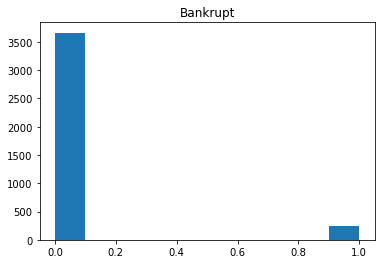

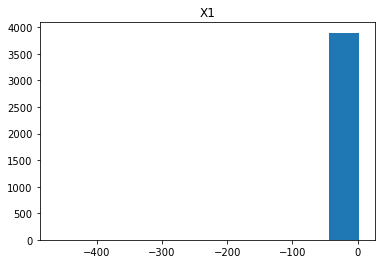

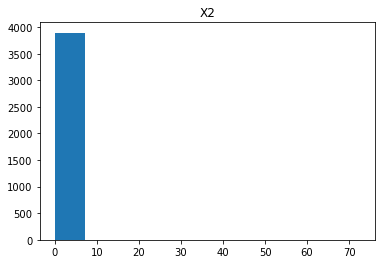

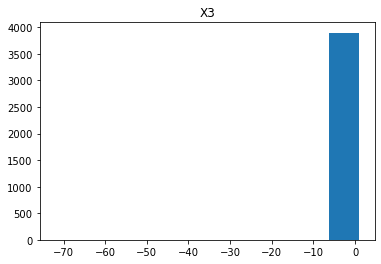

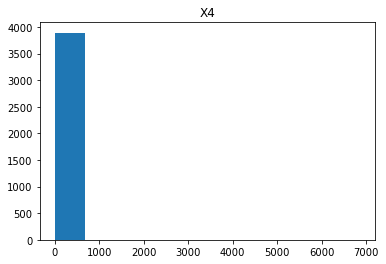

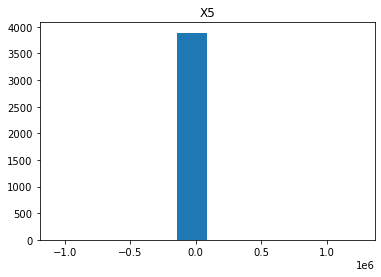

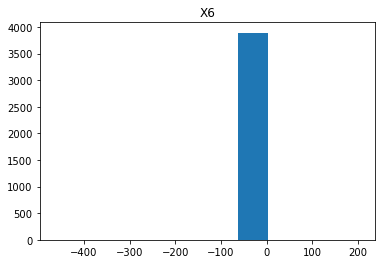

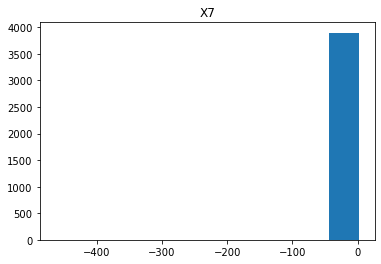

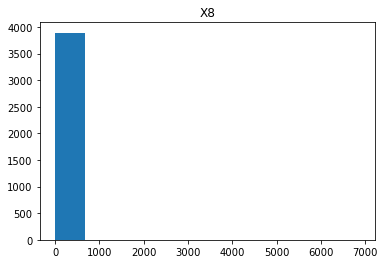

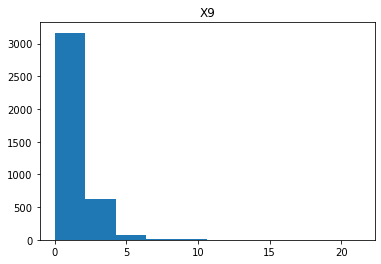

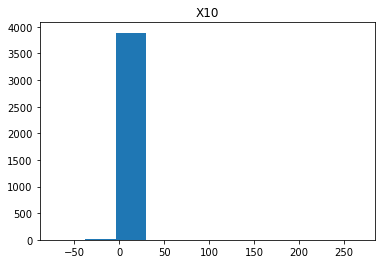

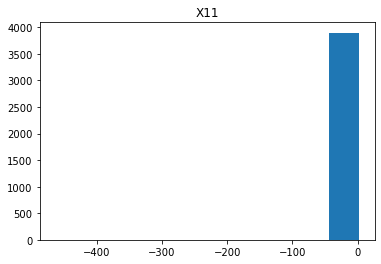

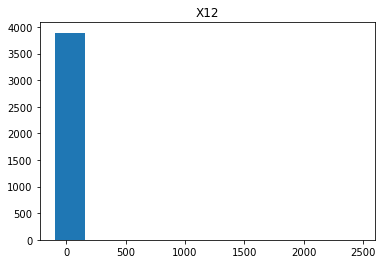

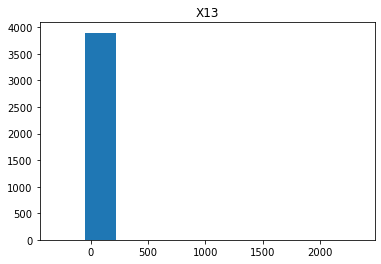

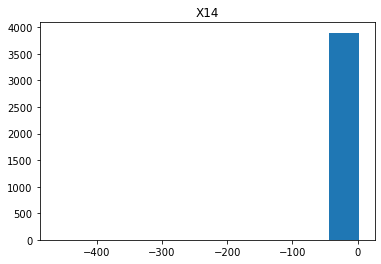

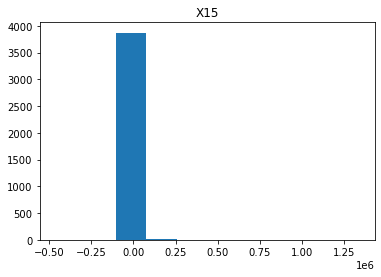

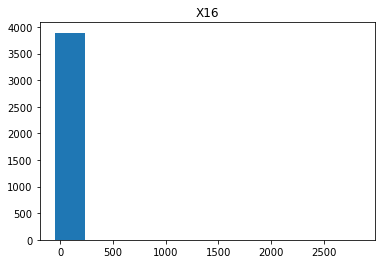

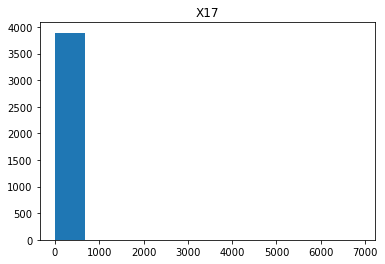

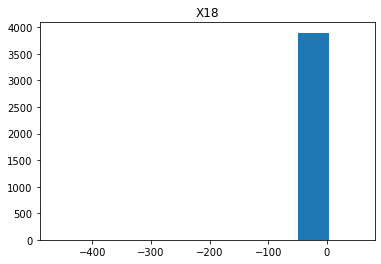

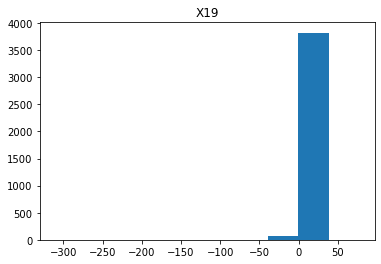

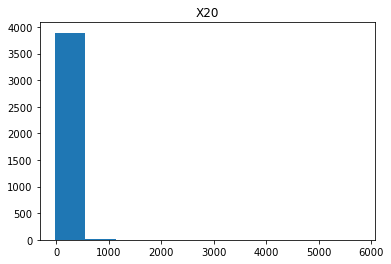

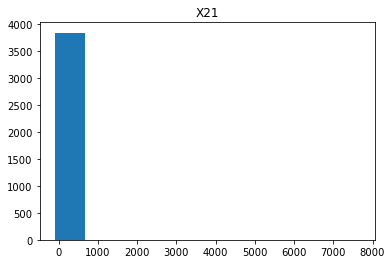

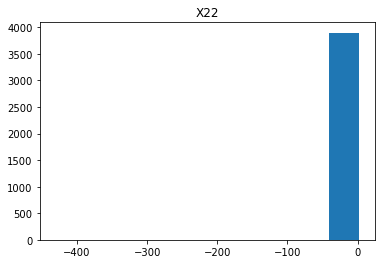

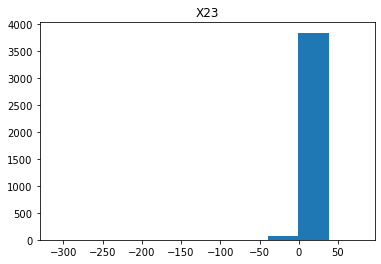

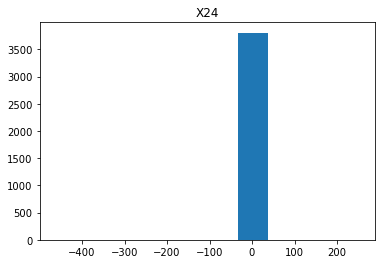

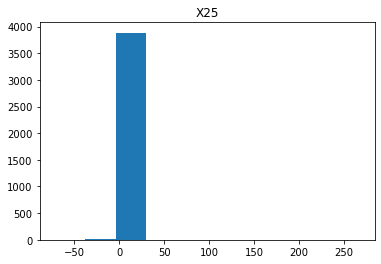

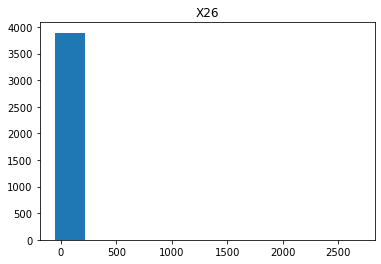

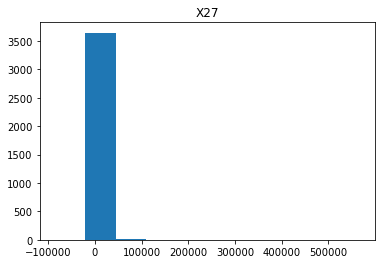

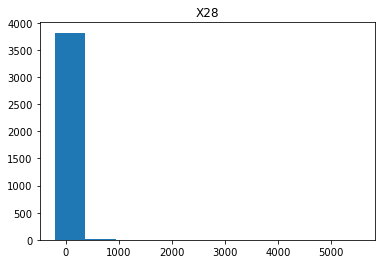

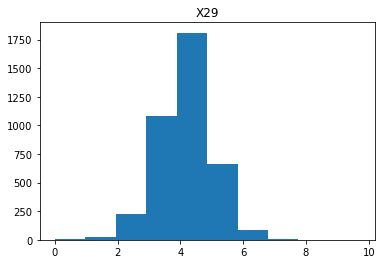

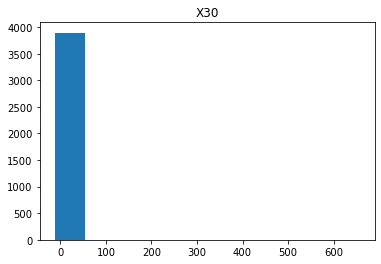

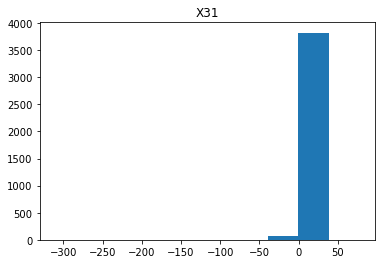

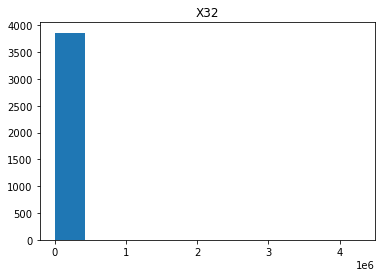

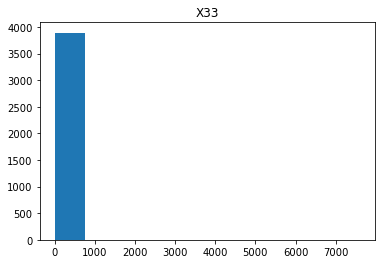

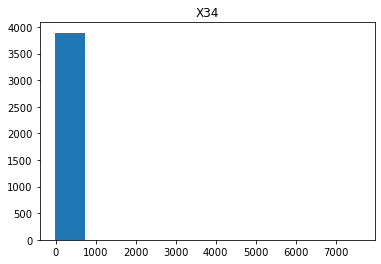

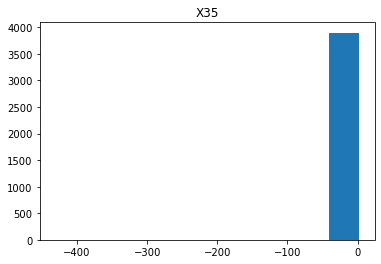

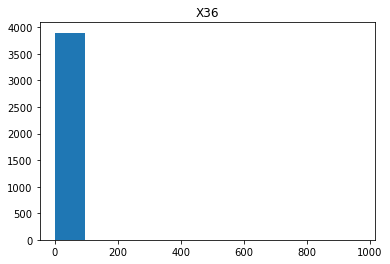

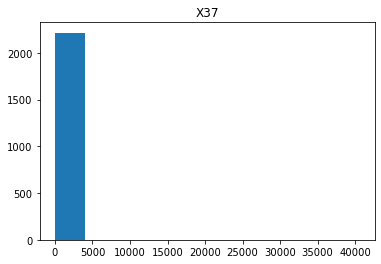

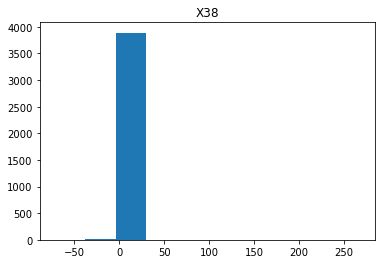

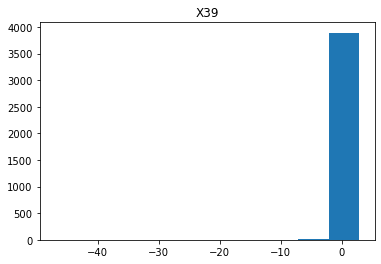

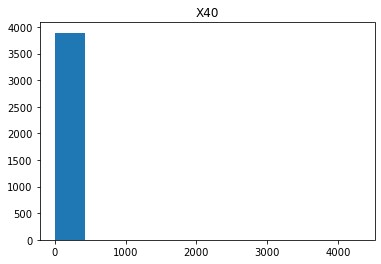

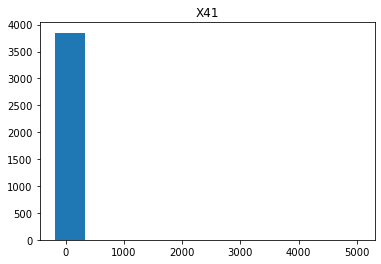

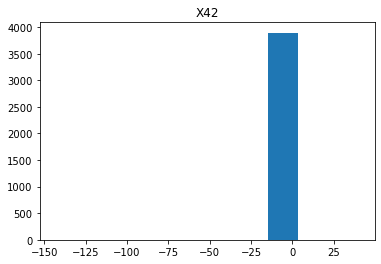

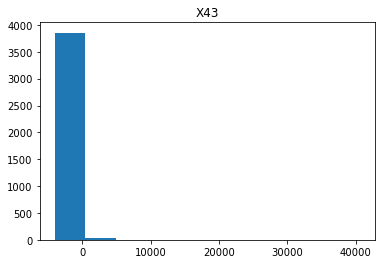

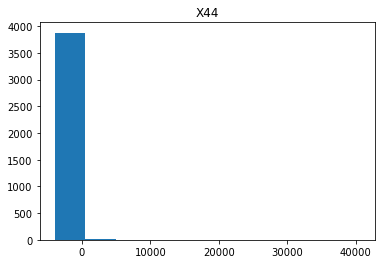

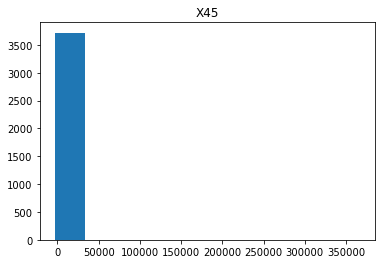

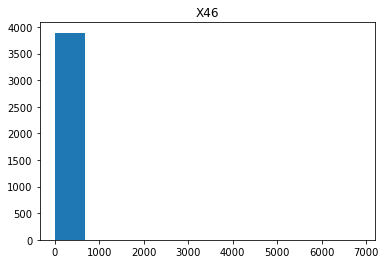

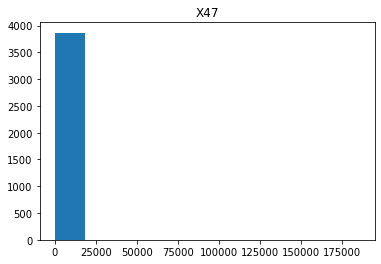

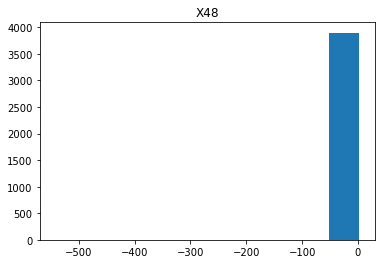

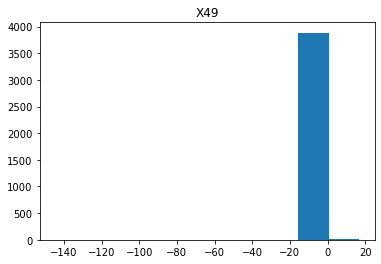

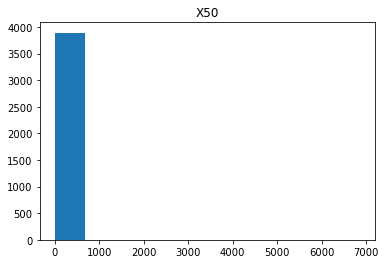

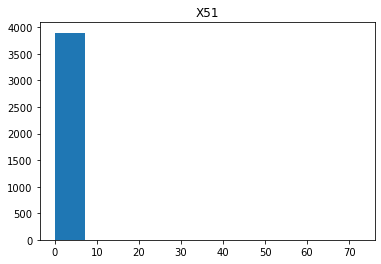

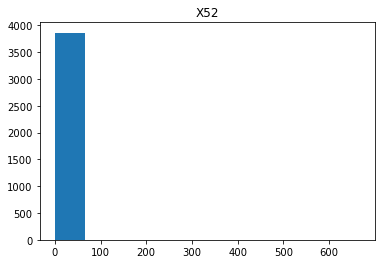

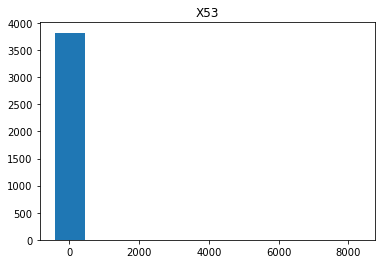

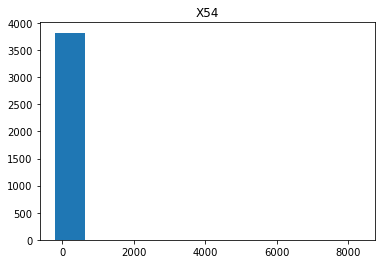

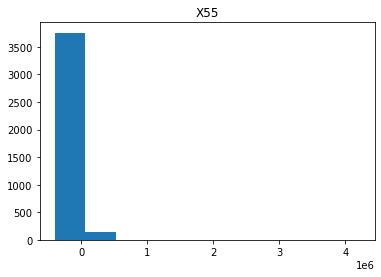

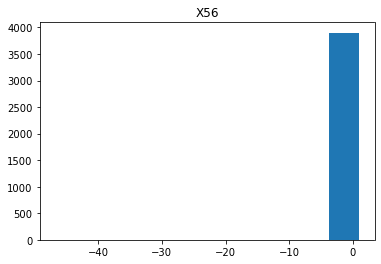

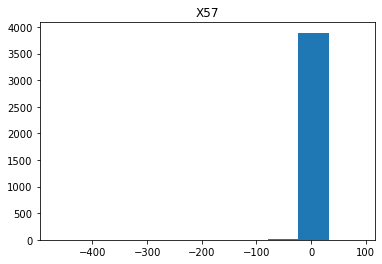

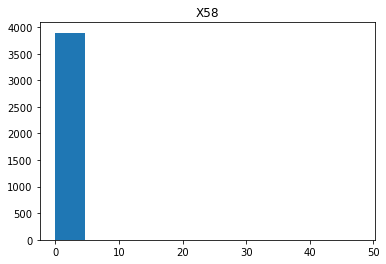

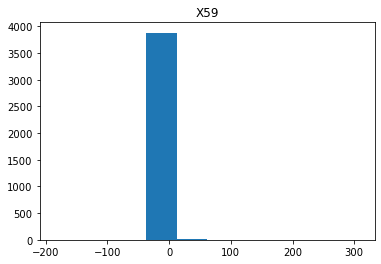

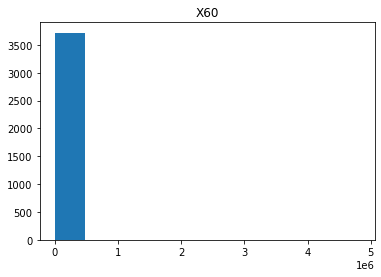

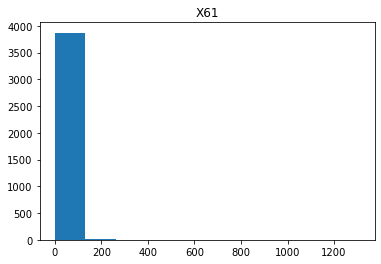

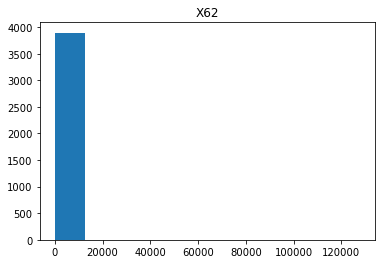

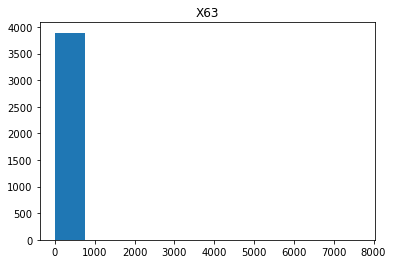

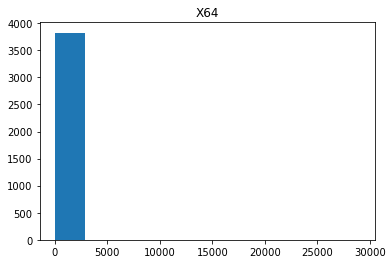

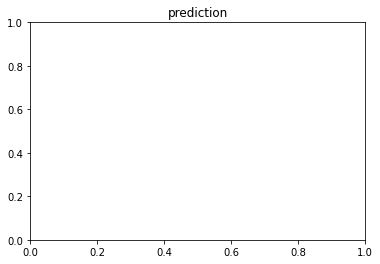

In [256]:
pd.set_option('display.max_columns', 70)
for i in wrong_pred.columns:

    plt.figure()
    plt.title(i)
    plt.hist(training_pre[i])

* We can see that almost all of the features are concentrate around some area and have some extreme value 
    * Some of them are highly skewed
    * We should transfrom the variable to be more standard distribution before putting into the model
    
    
#### Note 1 check distribution



In [257]:
wrong_pred.describe()

,Bankrupt,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,prediction
count,222.0,222.000000,222.000000,222.000000,221.000000,222.000000,222.000000,222.000000,221.000000,222.000000,222.000000,222.000000,221.000000,222.000000,222.000000,222.000000,221.000000,221.000000,222.000000,222.000000,222.000000,174.000000,222.000000,222.000000,222.000000,222.000000,221.000000,152.000000,214.000000,222.000000,222.000000,222.000000,221.000000,221.000000,221.000000,222.000000,222.000000,112.000000,222.000000,222.000000,221.000000,222.000000,222.000000,222.000000,222.000000,208.000000,221.000000,222.000000,222.000000,222.000000,221.000000,222.000000,222.000000,214.000000,214.000000,222.000000,222.000000,222.000000,222.000000,222.000000,208.000000,222.000000,222.000000,221.000000,214.000000,222.0
mean,1.0,-0.087902,0.805520,-0.081662,1.791861,-45.546094,-0.245043,-0.081623,1.114819,1.886717,0.165797,-0.048353,-0.012770,-0.053304,-0.081623,-1175.888288,0.026060,2.201854,-0.081623,-0.087032,58.017937,0.950491,-0.048649,-0.090528,0.027319,-0.034496,0.010737,-75.224341,7.749535,3.772379,0.857995,-0.062546,179.559792,4.791439,3.025288,-0.101913,2.150712,29.163729,0.255715,-0.104633,0.515107,-0.069798,-0.059700,161.452842,103.434735,0.842420,1.087754,96.925428,-0.086092,-0.093495,1.422980,0.665120,0.750677,5.306958,8.054730,-2927.627421,-0.047300,-0.393473,1.031874,0.644494,110.303006,16.043181,193.741305,4.611338,33.103418,0.0
std,0.0,0.318296,0.576171,0.580005,3.669866,383.415238,0.681454,0.330382,3.024583,1.855974,0.586427,0.317939,0.987712,0.458066,0.330382,16402.429562,0.616062,3.195280,0.330382,0.459945,73.067034,0.309308,0.318190,0.440443,0.553651,0.663984,0.572444,853.496924,63.307764,0.891965,3.790047,0.428615,202.285913,5.834098,4.970820,0.304027,1.881747,147.148922,0.545526,0.246211,1.997026,1.236367,0.302644,531.772446,530.058739,28.540736,2.654742,672.140353,0.327349,0.320474,2.900845,0.516934,4.527392,68.086404,62.133253,18421.314227,0.275288,7.043358,0.268502,5.718839,1229.828161,73.142871,229.184936,5.814083,139.849546,0.0
min,1.0,-1.458200,0.000000,-2.817600,0.079053,-1338.200000,-7.181000,-1.458200,-0.787670,0.011616,-2.649200,-1.337500,-3.242900,-2.242700,-1.458200,-96176.000000,-2.331100,0.292590,-1.458200,-2.456100,0.000000,0.086974,-1.344800,-2.456100,-2.637900,-3.181900,-2.331100,-10510.000000,-31.211000,1.662400,-1.323100,-1.787200,0.000000,0.014808,-1.240000,-1.612300,0.013176,0.030136,-2.649200,-1.723400,0.000002,-7.606400,-1.787200,11.451000,0.337660,-24.122000,0.002131,0.000000,-1.417600,-2.294400,0.041125,0.000000,0.000000,-414.740000,-30.822000,-178810.000000,-1.723400,-69.000000,0.092607,-9.429500,0.517930,0.046252,0.000000,0.248590,0.013466,0.0
25%,1.0,-0.198865,0.474093,-0.268757,0.557970,-119.960000,-0.242138,-0.212735,0.063909,0.931532,0.060300,-0.175088,-0.313990,-0.115072,-0.212735,-2261.750000,-0.207710,1.064600,-0.212735,-0.151600,14.919500,0.727980,-0.176790,-0.145415,-0.226835,-0.190047,-0.206320,-5.629550,-0.461800,3.179450,0.209083,-0.140845,73.627000,1.895700,0.415880,-0.197225,1.036100,0.859572,0.133255,-0.152103,0.017293,-0.217455,-0.131683,59.774750,29.271750,-1.235375,0.235260,11.821500,-0.215420,-0.162180,0.451100,0.354965,0.185878,0.095656,0.356818,-2296.325000,-0.109245,-0.423023,0.951372,0.000000,4.677675,4.683325,68.156750,1.755900,2.015800,0.0
50%,1.0,-0.051916,0.717090,-0.006206,0.971600,-55.350500,0.000000,-0.051649,0.370290,1.149700,0.266930,-0.032628,-0.089592,-0.011163,-0.051649,-667.470000,-0.035871,1.394100,-0.051649,-0.028330,37.334000,0.955075,-0.033155,-0.029611,-0.027402,0.121855,-0.036118,-1.064350,-0.038314,3.839300,0.402190,-0.022528,114.400000,3.239000,1.870300,-0.064052,1.608350,2.338650,0.352775,-0.040846,0.045839,-0.031178,-0.019412,104.095000,47.960500,-0.275705,0.450070,34.936500,-

### What if taking transformation to reduced skewness help?
    * Take np.log to the data
    * +0.01 small value before taking the log due to the log cannot be taking on zeros
    * Plot these distribution on the transfromation

In [279]:
col_selected = [i for i in dataset_investigate.columns if i not in ["Bankrupt"]]
X_val = dataset_investigate.loc[:, col_selected]
Y_val = dataset_investigate.loc[:, ["Bankrupt"]]
X_log = np.sign(X_val) * np.log(np.abs(X_val)+0.01)             

<ipython-input-279-2c88b4eb7bf0>:4: RuntimeWarning: invalid value encountered in sign
  X_log = np.sign(X_val) * np.log(np.abs(X_val)+0.01)


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X1')

C:\Users\wann\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\wann\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.00e+00, 2.91e+02, 7.86e+02, 1.29e+03, 6.44e+02, 1.10e+02,
        1.15e+02, 2.68e+02, 2.61e+02, 1.34e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X2')

(array([1.700e+01, 7.800e+01, 3.150e+02, 9.890e+02, 2.071e+03, 3.910e+02,
        3.200e+01, 6.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X3')

(array([  75.,  192.,  540., 1212., 1165.,  125.,  174.,  215.,  137.,
          65.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X4')

(array([3.000e+00, 1.500e+01, 1.960e+02, 2.263e+03, 1.201e+03, 1.850e+02,
        2.300e+01, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X5')

(array([2.000e+00, 7.000e+00, 1.280e+02, 1.422e+03, 3.650e+02, 4.310e+02,
        1.420e+03, 1.100e+02, 6.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X6')

(array([1.000e+00, 1.160e+02, 2.250e+02, 5.070e+02, 6.470e+02, 1.723e+03,
        2.610e+02, 2.190e+02, 1.340e+02, 6.700e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X7')

(array([1.000e+00, 2.310e+02, 7.490e+02, 1.253e+03, 7.880e+02, 1.060e+02,
        1.230e+02, 2.670e+02, 2.630e+02, 1.190e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X8')

(array([3.000e+01, 1.630e+02, 7.880e+02, 1.579e+03, 1.012e+03, 2.700e+02,
        4.100e+01, 6.000e+00, 3.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X9')

(array([   6.,    6.,   15.,   16.,   72.,  786., 2292.,  625.,   73.,
          11.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X10')

(array([2.300e+01, 6.600e+01, 3.240e+02, 1.760e+03, 1.585e+03, 5.800e+01,
        4.200e+01, 3.100e+01, 1.000e+01, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X11')

(array([1.000e+00, 1.470e+02, 6.680e+02, 1.418e+03, 8.780e+02, 1.190e+02,
        9.600e+01, 2.340e+02, 2.370e+02, 1.020e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X12')

(array([ 257.,  624., 1044.,  897.,  608.,  325.,  112.,   24.,    0.,
           2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X13')

(array([2.700e+01, 7.190e+02, 1.991e+03, 5.860e+02, 8.900e+01, 1.910e+02,
        2.070e+02, 9.100e+01, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X14')

(array([1.000e+00, 2.300e+02, 7.490e+02, 1.253e+03, 7.890e+02, 1.060e+02,
        1.230e+02, 2.670e+02, 2.630e+02, 1.190e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X15')

(array([  26.,  296.,  212.,    8.,    8.,   22.,  671., 2320.,  318.,
          18.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X16')

(array([1.290e+02, 5.890e+02, 1.293e+03, 9.800e+02, 5.200e+02, 2.550e+02,
        1.140e+02, 1.200e+01, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X17')

(array([2.000e+00, 8.000e+00, 9.000e+01, 2.374e+03, 1.184e+03, 2.010e+02,
        2.700e+01, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X18')

(array([1.000e+00, 2.300e+02, 7.490e+02, 1.253e+03, 7.880e+02, 1.060e+02,
        1.230e+02, 2.670e+02, 2.630e+02, 1.200e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X19')

(array([   2.,  591., 1129., 1101.,  272.,   43.,  120.,  230.,  252.,
         162.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X20')

(array([   4.,   11.,   20.,  236.,  194., 1008., 2028.,  383.,   15.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<ipython-input-797-caa16893acd7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X21')

(array([1.000e+00, 7.000e+00, 1.110e+02, 3.668e+03, 4.900e+01, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X22')

(array([1.000e+00, 1.390e+02, 6.220e+02, 1.388e+03, 7.390e+02, 4.390e+02,
        9.500e+01, 1.890e+02, 1.760e+02, 1.120e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X23')

(array([   2.,  682., 1166., 1006.,  210.,   63.,  120.,  222.,  246.,
         185.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X25')

(array([  51.,  165.,  485., 1758., 1146.,  119.,   95.,   52.,   27.,
           2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X26')

(array([1.190e+02, 6.400e+02, 1.326e+03, 9.300e+02, 4.810e+02, 2.630e+02,
        1.110e+02, 2.200e+01, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X27')

(array([   4.,   11.,   41.,  347., 1985.,  928.,  241.,   59.,   30.,
           9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X28')

(array([  33.,  157.,  638., 1271., 1015.,  515.,  159.,   32.,    8.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X29')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 1.840e+02, 3.254e+03, 4.540e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X30')

(array([  98.,  395., 1358., 1304.,  275.,  201.,  170.,   80.,   18.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X31')

(array([   2.,  466., 1124., 1216.,  323.,   53.,  106.,  220.,  240.,
         152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X32')

(array([3.000e+00, 1.400e+01, 6.800e+01, 1.839e+03, 1.850e+03, 7.100e+01,
        1.000e+01, 1.000e+00, 4.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X33')

(array([7.000e+00, 1.500e+01, 5.800e+01, 6.960e+02, 2.473e+03, 5.950e+02,
        4.300e+01, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X34')

(array([8.800e+01, 4.040e+02, 6.260e+02, 9.310e+02, 1.431e+03, 3.550e+02,
        5.400e+01, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X35')

(array([1.000e+00, 3.020e+02, 7.080e+02, 1.388e+03, 7.340e+02, 1.170e+02,
        9.800e+01, 2.100e+02, 2.140e+02, 1.280e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X36')

(array([8.000e+00, 2.200e+01, 5.900e+01, 8.060e+02, 2.643e+03, 3.470e+02,
        1.400e+01, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X38')

(array([1.500e+01, 3.700e+01, 1.790e+02, 1.503e+03, 2.067e+03, 3.900e+01,
        3.200e+01, 2.100e+01, 6.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X39')

(array([ 588.,  993., 1164.,  427.,   49.,   71.,  109.,  172.,  182.,
         147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X40')

(array([5.510e+02, 1.086e+03, 1.064e+03, 7.750e+02, 3.150e+02, 7.700e+01,
        1.500e+01, 8.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X41')

(array([ 143., 1132., 1602.,  518.,  244.,  159.,   45.,    7.,    3.,
           2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X42')

(array([ 191.,  739., 1302.,  655.,   72.,  397.,   97.,  147.,  185.,
         117.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X43')

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.300e+01, 4.800e+01,
        2.676e+03, 1.146e+03, 1.200e+01, 5.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X44')

(array([1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 3.600e+01, 2.670e+02,
        3.299e+03, 2.820e+02, 8.000e+00, 5.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X46')

(array([9.00e+00, 8.40e+01, 6.88e+02, 2.25e+03, 7.21e+02, 1.16e+02,
        1.80e+01, 3.00e+00, 3.00e+00, 1.00e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X47')

(array([   9.,   22.,  227.,  209., 1526., 1769.,   92.,   12.,    2.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X48')

(array([  1., 100., 504., 998., 604., 191., 142., 389., 544., 427.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X49')

(array([216., 669., 941., 404.,  58., 145., 168., 357., 481., 463.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X50')

(array([4.000e+00, 3.300e+01, 4.630e+02, 2.325e+03, 9.120e+02, 1.350e+02,
        1.800e+01, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X51')

(array([2.800e+01, 1.160e+02, 4.680e+02, 1.410e+03, 1.632e+03, 2.170e+02,
        2.300e+01, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X52')

(array([  31.,  357., 1972., 1309.,  155.,   28.,    7.,    7.,    0.,
           4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X53')

(array([   6.,   27.,  114., 1182., 1953.,  424.,   90.,   26.,    5.,
           4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X54')

(array([   7.,   29.,   95., 1865., 1437.,  305.,   62.,   23.,    4.,
           4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X55')

(array([  75.,  314.,  282.,   56.,  113.,   83.,  643., 1753.,  563.,
          20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X56')

(array([ 329.,  897., 1180.,  611.,  141.,   86.,  115.,  184.,  174.,
         185.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X57')

(array([1.000e+00, 1.390e+02, 4.130e+02, 9.890e+02, 1.244e+03, 4.880e+02,
        2.130e+02, 2.060e+02, 1.440e+02, 6.300e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X58')

(array([2.400e+01, 2.400e+01, 1.200e+01, 2.000e+01, 7.360e+02, 3.069e+03,
        8.000e+00, 3.000e+00, 3.000e+00, 3.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X59')

(array([1.660e+02, 3.330e+02, 4.460e+02, 5.740e+02, 2.122e+03, 1.780e+02,
        5.100e+01, 2.500e+01, 4.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X61')

(array([   4.,    7.,    4.,   83., 1242., 2165.,  313.,   54.,   14.,
           6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X62')

(array([1.000e+00, 1.100e+01, 2.000e+01, 1.790e+02, 2.046e+03, 1.521e+03,
        1.090e+02, 8.000e+00, 5.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X63')

(array([6.000e+00, 8.000e+00, 6.300e+01, 6.440e+02, 2.484e+03, 6.260e+02,
        5.400e+01, 5.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X64')

(array([  12.,   32.,  206., 1644., 1353.,  428.,  114.,   29.,   10.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

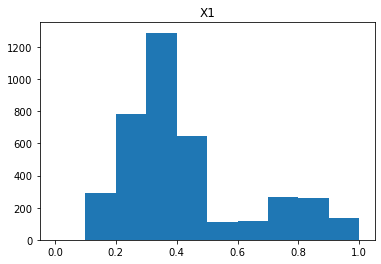

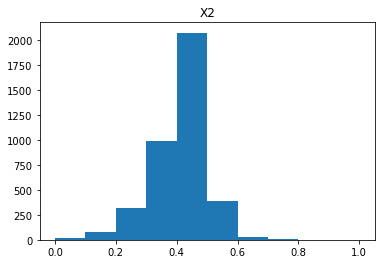

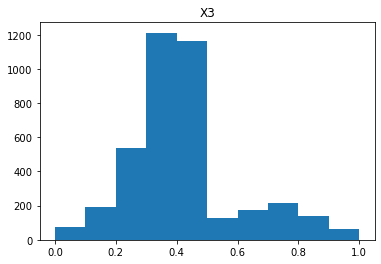

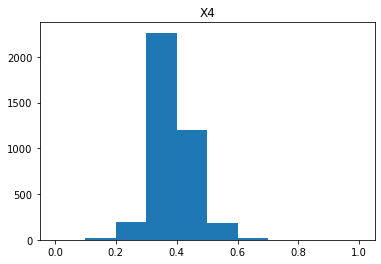

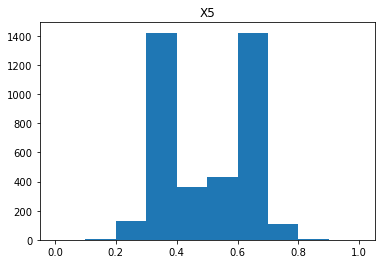

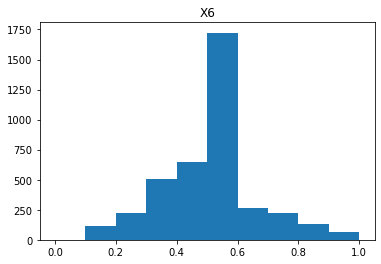

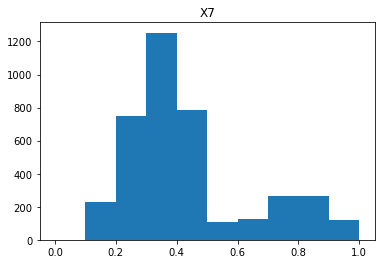

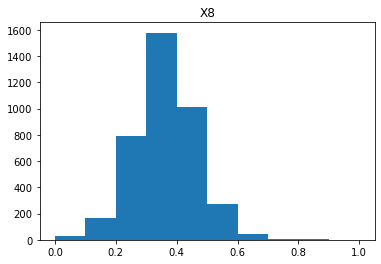

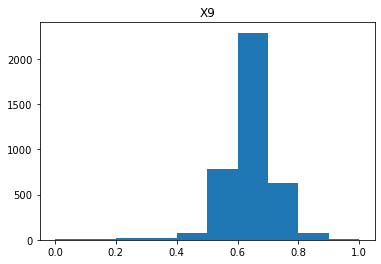

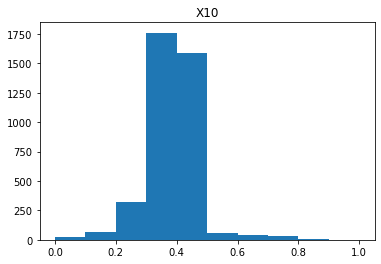

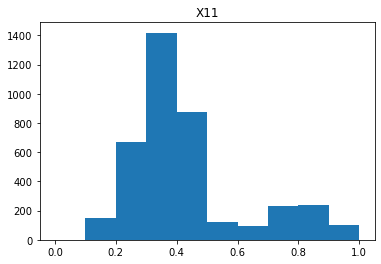

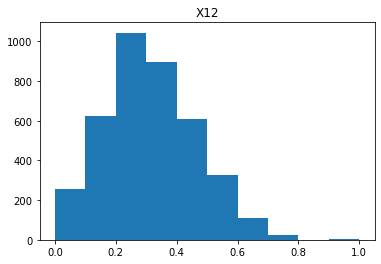

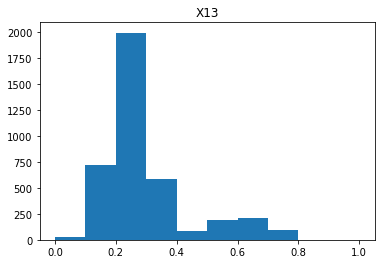

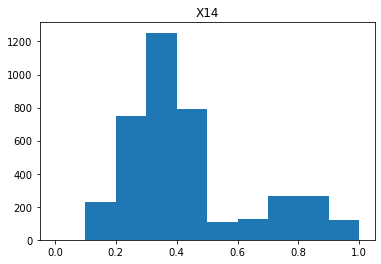

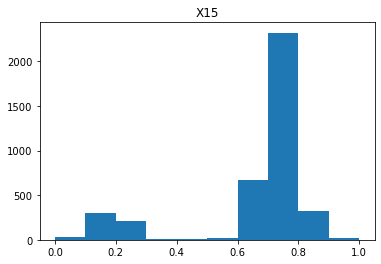

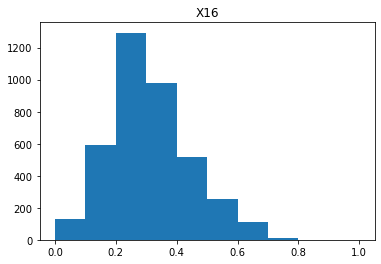

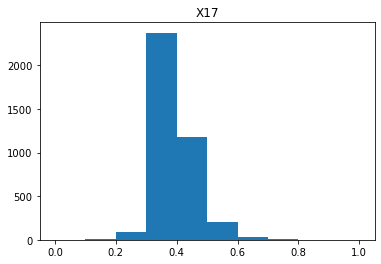

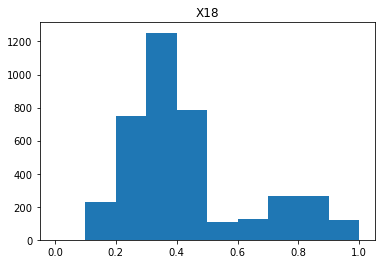

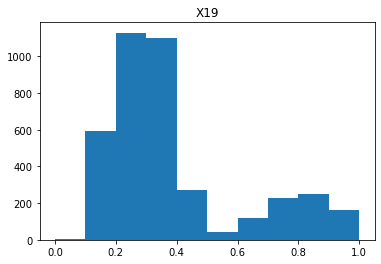

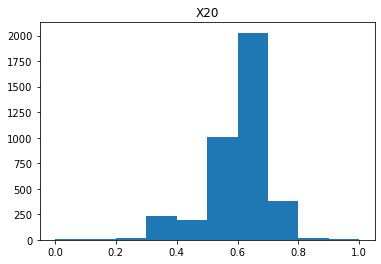

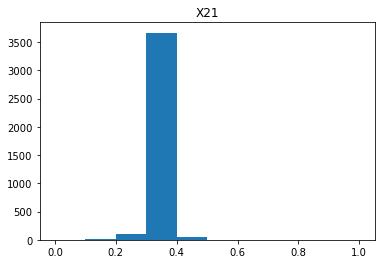

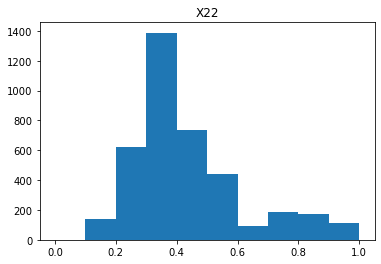

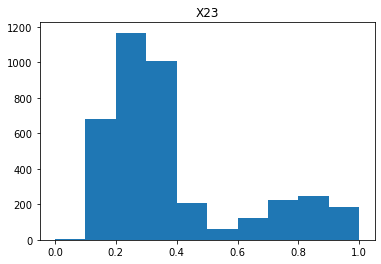

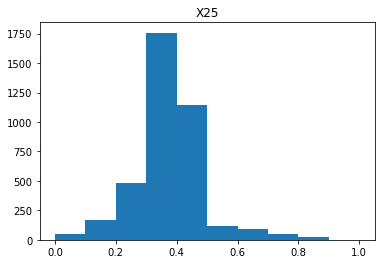

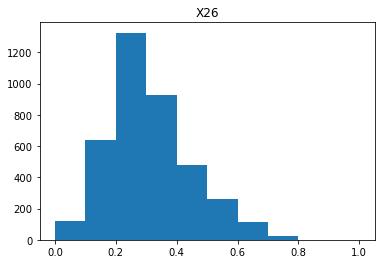

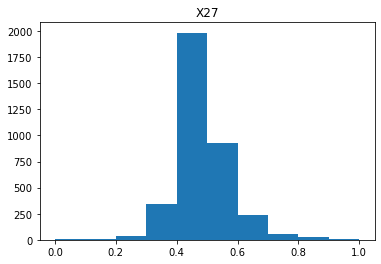

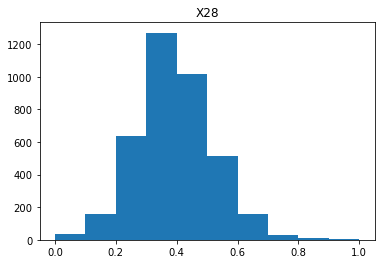

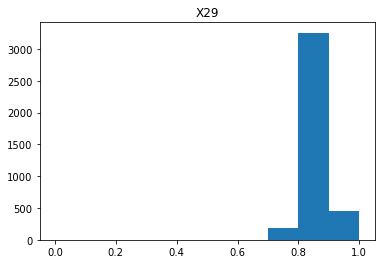

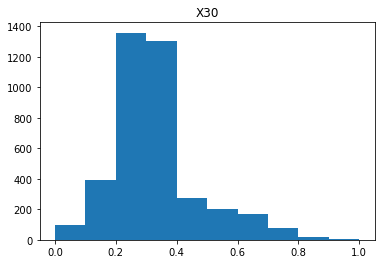

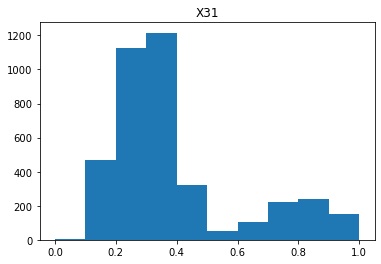

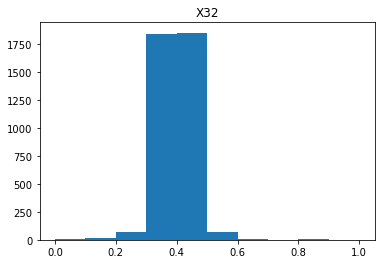

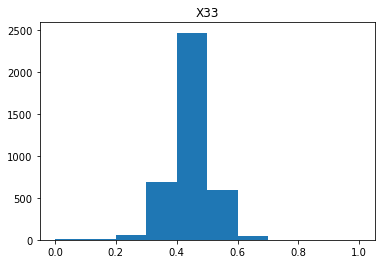

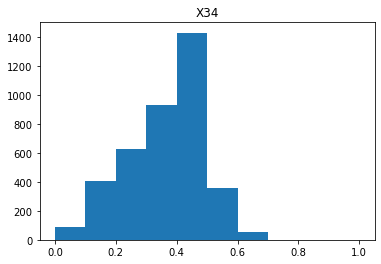

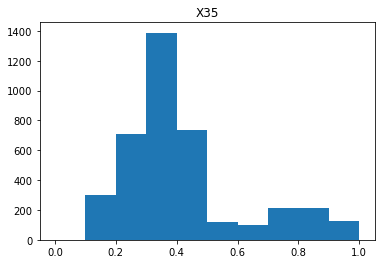

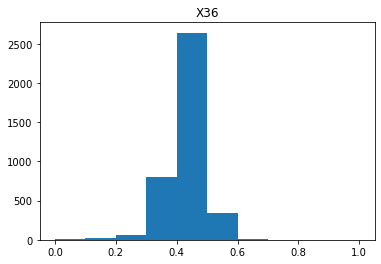

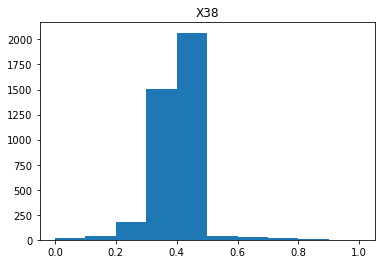

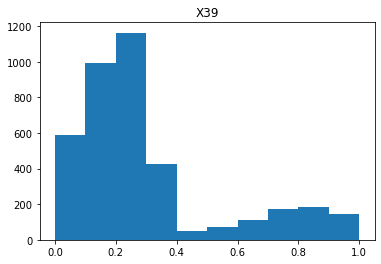

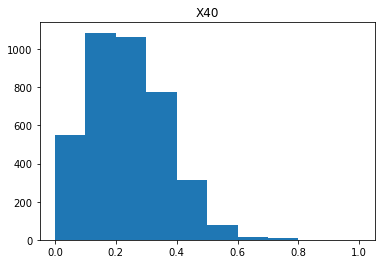

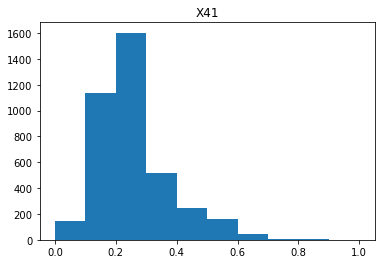

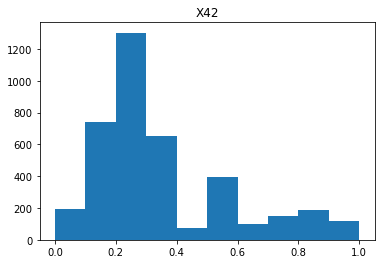

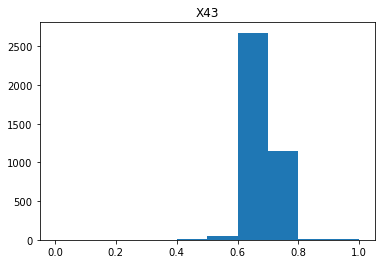

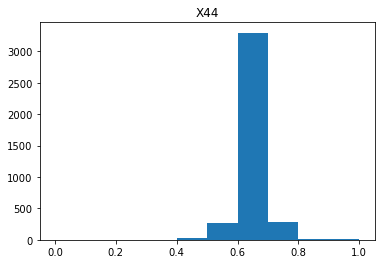

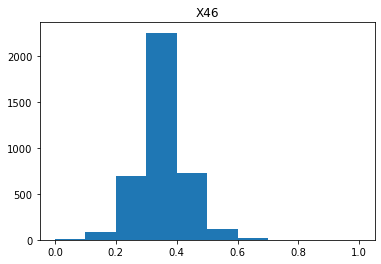

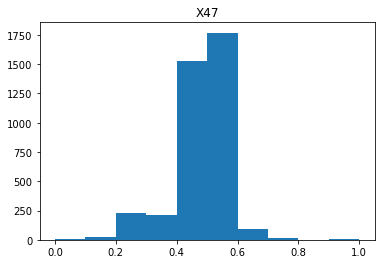

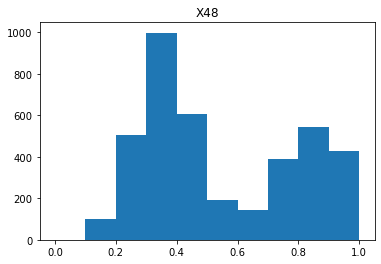

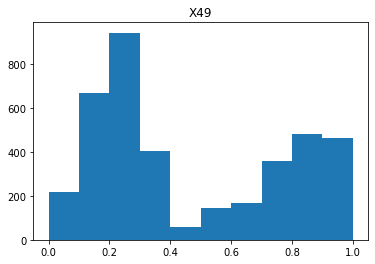

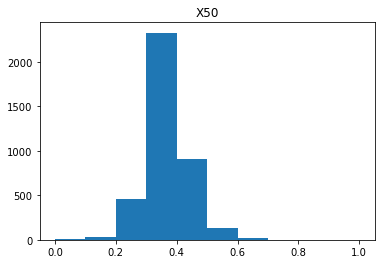

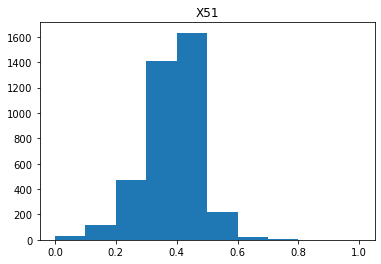

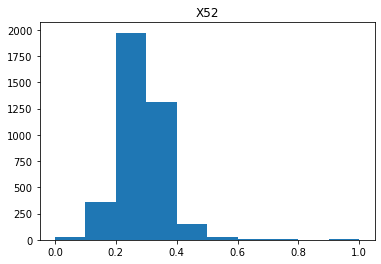

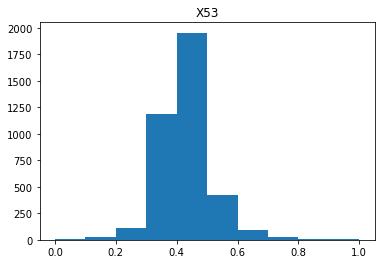

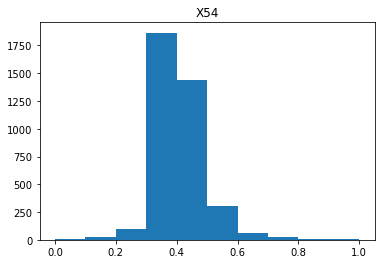

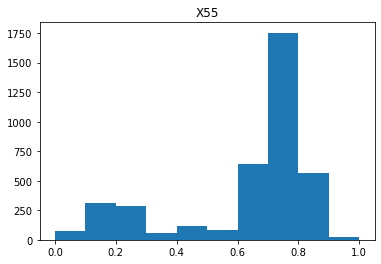

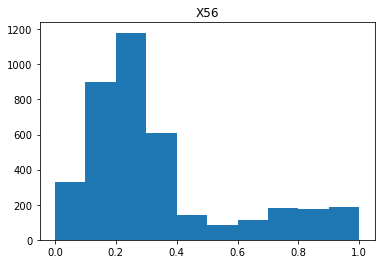

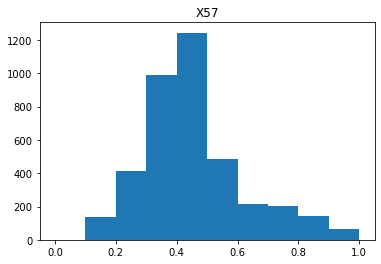

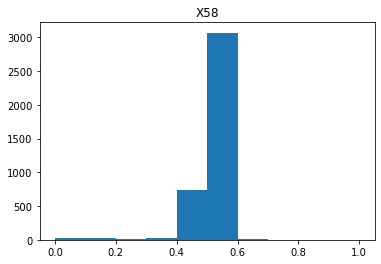

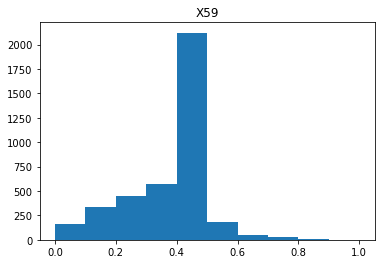

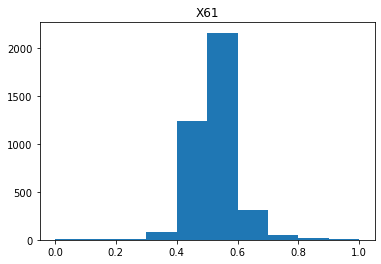

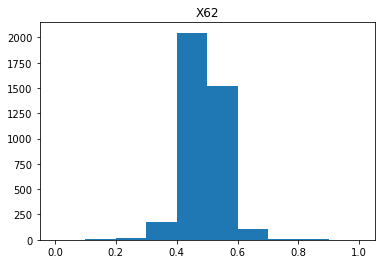

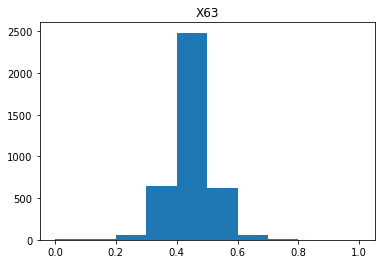

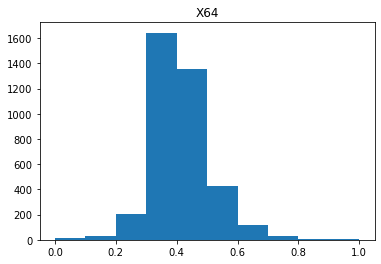

In [797]:
pd.set_option('display.max_columns', 70)
for i in X_log.columns:

    plt.figure()
    plt.title(i)
    plt.hist(X_log[i])

## We can clearly see the distribution much more smoother
    * Most of them convert into approximately normal
    * This transformation should be benefitial for model like logistic regression

##  Looking at missing value 

### The below code crate the sum of nan per features
    * It also provide the column(1) which mean the percentage of missing value on 
    particular feature fall into class 1 vs class 0 
    * nan that feature class 1 / (nan that feature class 0 + nan that feature class 1)
    * Column sum_miss is the sum of missing value of each features 

In [275]:
x_missing = pd.isna(dataset_investigate).loc[:, dataset_investigate.columns != 'Bankrupt']
x_missing["Bankrupt"] = dataset_investigate.loc[:,'Bankrupt']

df_sm = x_missing.groupby("Bankrupt").sum()
res = df_sm.div(df_sm.sum(axis=1), axis=0)
pd.set_option('display.max_rows', 70)

df_pct = pd.DataFrame(df_sm.apply(lambda x: x / x.sum()).iloc[1,])
df_pct["sum_miss"] = x_missing.sum()

##df_pct.sort_values("sum_miss")

,1,sum_miss
sum_na,NaN,0.0
X31,NaN,0.0
X23,NaN,0.0
prediction,NaN,0.0
X20,NaN,0.0
X19,NaN,0.0
X39,NaN,0.0
X42,NaN,0.0
X43,NaN,0.0
X30,NaN,0.0


## Observation 

### We can clearly see that X21 ,X27 have significant percentage of missing value in class 1 
* (even though class 1 is minority)
* These are great insight and can be further used for feature engineering 

* X37 ,X24 , X45 , X60 have too many missing value 
    * we consider delete  column out of system 
    * the meaning of each column
        * X24 gross profit (in 3 years) / total assets 
        * X37 (current assets - inventories) / long-term liabilities
        * X45 net profit / inventory
        * X60 sales / inventory
    * aside from X37 , X24 the remaining column should not be the significant factor indeciding company bankruptcy
    * X24 has gross profit : however can easily be substituted by other features column that  has quite similar meaning
    * X37 has long term liailities : however can easily be substituted by other features column has quite similar meaning
    
    
#### Note 1 check distribution : takeing np.log(x+0.01) to smoothing the distribution
#### Note 2 delete missing value column + create dummy for 2 missing features X21 X27

    * Consider further using the knnimputer rather than mean imputing 
        * since the data now much more smooth distribution
        * needed of scaling before putting in such model imputation
   

In [282]:
dataset_investigate.groupby(["Bankrupt"]).size()

Bankrupt
0    3663
1     239
dtype: int64

### Note 3 Imbalance dataset : the Class 0 label are 15 times more observation than   Class 1 label
* Need to adjusted the data into balance dataset 
* Upsampling + downsampling

### Final thought on features transfromation 

* Note 1 check distribution : takeing np.log(x+0.01) to smoothing the distribution
* Note 2 delete missing value column + create dummy for 2 missing features X21 X27
* Note 3 Imbalance dataset : the Class 0 label are 15 times more observation than Class 1 label


# Start data Preparation

### Transform distribution

In [ ]:
# training_pre = pd.merge(y_train_pre, X_train_pre, left_index=True, right_index=True)
# validation_pre = pd.merge(y_valid_pre, X_valid_pre, left_index=True, right_index=True)
# testing_pre = pd.merge(y_test_pre, X_test_pre, left_index=True, right_index=True)      

* Delete ["X24","X37","X45","X60"] columns due to many missing value and taking the log of feature 

In [51]:
col_selected = [i for i in df.columns if i not in ["X24","X37","X45","X60","Bankrupt"]]

X_val = training_pre.loc[:, col_selected]
Y_val = training_pre.loc[:, ["Bankrupt"]]
X_log = np.sign(X_val) * np.log(np.abs(X_val)+0.01)          

<ipython-input-51-0da8c3ff9d13>:5: RuntimeWarning: invalid value encountered in sign
  X_log = np.sign(X_val) * np.log(np.abs(X_val)+0.01)


### Missing data imputation 

* Create Dummy variable for missing value of column  X21 , X27 
    * X21_ismissing : 1 if X21 missing , 0 if otherwise
    * X27_ismissing : 1 if X27 missing , 0 if otherwise

In [52]:
X_val_dummy = X_log.copy()
X_val_dummy['X21_ismissing'] = np.where(X_log['X21'].isna(), 1, 0)
X_val_dummy['X27_ismissing'] = np.where(X_log['X27'].isna(), 1, 0)
X_val_dummy = X_val_dummy[['X21_ismissing','X27_ismissing']]

* Scaled the data before putting in the knnimpute model 
* Use min maxscaler to scaled into (0,1) range

In [53]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
min_max_fit = scaler.fit(X_log)
X_log = pd.DataFrame(min_max_fit.transform(X_log), index=X_log.index, columns = X_log.columns)
X_log.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X38,X39,X40,X41,X42,X43,X44,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X61,X62,X63,X64
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4744,0.500736,0.444697,0.343335,0.368128,0.620329,0.536044,0.499417,0.335547,0.747632,0.378597,0.499751,0.359812,0.292507,0.499417,0.699652,0.362171,0.369339,0.499417,0.374264,0.346768,0.347090,0.495951,0.374969,0.369189,0.364419,0.685672,0.371678,0.856098,0.248116,0.374884,0.392531,0.455418,0.460816,0.500917,0.497681,0.378597,0.303097,0.142485,0.155449,0.324088,0.672629,0.672500,0.368128,0.274789,0.498109,0.315389,0.368209,0.444697,0.271039,0.441999,0.414307,0.721069,0.301945,0.569573,0.499619,0.476700,0.488548,0.475853,0.463019,0.473511
4640,0.389662,0.450438,0.421453,0.487661,0.629324,0.354993,0.410718,0.325928,0.616437,0.371039,0.410692,0.433549,0.283508,0.410718,0.730166,0.297081,0.365350,0.410718,0.343787,0.667455,0.352283,0.424773,0.322353,0.369010,0.284921,0.476744,0.384827,0.885609,0.299650,0.344356,0.321170,0.551808,0.270001,0.424773,0.442012,0.440293,0.283643,0.363057,0.195154,0.310676,0.684029,0.623699,0.423927,0.536998,0.408138,0.279541,0.341943,0.241232,0.165420,0.400323,0.419861,0.813013,0.282488,0.462832,0.501913,0.481007,0.571196,0.389476,0.557865,0.392503
2221,0.573335,0.465101,0.121227,0.344321,0.343391,0.536044,0.281358,0.304106,0.656960,0.355266,0.365335,0.164340,0.243333,0.281358,0.758623,0.237547,0.355188,0.281358,0.221950,0.665754,0.334441,0.360301,0.556053,0.346684,0.213712,0.478867,0.170885,0.863917,0.328075,0.275079,0.424493,0.412321,0.402580,0.377027,0.437323,0.380486,0.234596,0.098659,0.228441,0.245674,0.691471,0.645801,0.283478,0.532371,0.235134,0.105221,0.328783,0.441684,0.321278,0.386136,0.373682,0.652390,0.233463,0.575711,0.514368,0.369285,0.533750,0.521359,0.413131,0.385950
2720,0.155112,0.406622,0.290889,0.369057,0.356713,0.276370,0.184381,0.381240,0.601869,0.404804,0.184369,0.083873,0.235009,0.184381,0.754524,0.246015,0.395921,0.184381,0.147620,0.685162,0.334453,0.258730,0.120492,0.402884,0.243597,0.404233,0.281478,0.879814,0.307023,0.147864,0.408547,0.433813,0.155993,0.258730,0.413010,0.414594,0.129189,0.086719,0.232994,0.162090,0.697437,0.639148,0.290078,0.544356,0.842402,0.833688,0.354016,0.384305,0.296080,0.408489,0.386088,0.754784,0.127042,0.162623,0.514288,0.279823,0.545019,0.505478,0.430534,0.354856
4989,0.342221,0.482941,0.769437,0.328621,0.331136,0.536044,0.348118,0.267956,0.648583,0.323379,0.377868,0.230833,0.259175,0.348118,0.758106,0.238613,0.342863,0.348118,0.290759,0.670378,0.350424,0.369217,0.284598,0.314840,0.236948,0.509008,0.524541,0.838603,0.349250,0.311551,0.425103,0.411496,0.386482,0.365170,0.431746,0.368121,0.227538,0.061115,0.244190,0.261048,0.681692,0.610664,0.233865,0.535684,0.317058,0.191137,0.297860,0.436480,0.322251,0.349854,0.349531,0.267496,0.226407,0.457042,0.510680,0.430623,0.593290,0.522523,0.411857,0.366657


* KNNImputer for imputing missing value 

In [54]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
knn_imputed_model = imputer.fit(X_log)
X_log_imputed = pd.DataFrame(knn_imputed_model.transform(X_log),index=X_log.index,columns = X_log.columns)

In [55]:
# join dummy variable into imputed X
X_training = pd.merge(X_log_imputed, X_val_dummy, left_index=True, right_index=True)
X_training

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X38,X39,X40,X41,X42,X43,X44,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X61,X62,X63,X64,X21_ismissing,X27_ismissing
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4744,0.500736,0.444697,0.343335,0.368128,0.620329,0.536044,0.499417,0.335547,0.747632,0.378597,0.499751,0.359812,0.292507,0.499417,0.699652,0.362171,0.369339,0.499417,0.374264,0.346768,0.347090,0.495951,0.374969,0.369189,0.364419,0.685672,0.371678,0.856098,0.248116,0.374884,0.392531,0.455418,0.460816,0.500917,0.497681,0.378597,0.303097,0.142485,0.155449,0.324088,0.672629,0.672500,0.368128,0.274789,0.498109,0.315389,0.368209,0.444697,0.271039,0.441999,0.414307,0.721069,0.301945,0.569573,0.499619,0.476700,0.488548,0.475853,0.463019,0.473511,0,0
4640,0.389662,0.450438,0.421453,0.487661,0.629324,0.354993,0.410718,0.325928,0.616437,0.371039,0.410692,0.433549,0.283508,0.410718,0.730166,0.297081,0.365350,0.410718,0.343787,0.667455,0.352283,0.424773,0.322353,0.369010,0.284921,0.476744,0.384827,0.885609,0.299650,0.344356,0.321170,0.551808,0.270001,0.424773,0.442012,0.440293,0.283643,0.363057,0.195154,0.310676,0.684029,0.623699,0.423927,0.536998,0.408138,0.279541,0.341943,0.241232,0.165420,0.400323,0.419861,0.813013,0.282488,0.462832,0.501913,0.481007,0.571196,0.389476,0.557865,0.392503,0,0
2221,0.573335,0.465101,0.121227,0.344321,0.343391,0.536044,0.281358,0.304106,0.656960,0.355266,0.365335,0.164340,0.243333,0.281358,0.758623,0.237547,0.355188,0.281358,0.221950,0.665754,0.334441,0.360301,0.556053,0.346684,0.213712,0.478867,0.170885,0.863917,0.328075,0.275079,0.424493,0.412321,0.402580,0.377027,0.437323,0.380486,0.234596,0.098659,0.228441,0.245674,0.691471,0.645801,0.283478,0.532371,0.235134,0.105221,0.328783,0.441684,0.321278,0.386136,0.373682,0.652390,0.233463,0.575711,0.514368,0.369285,0.533750,0.521359,0.413131,0.385950,0,0
2720,0.155112,0.406622,0.290889,0.369057,0.356713,0.276370,0.184381,0.381240,0.601869,0.404804,0.184369,0.083873,0.235009,0.184381,0.754524,0.246015,0.395921,0.184381,0.147620,0.685162,0.334453,0.258730,0.120492,0.402884,0.243597,0.404233,0.281478,0.879814,0.307023,0.147864,0.408547,0.433813,0.155993,0.258730,0.413010,0.414594,0.129189,0.086719,0.232994,0.162090,0.697437,0.639148,0.290078,0.544356,0.842402,0.833688,0.354016,0.384305,0.296080,0.408489,0.386088,0.754784,0.127042,0.162623,0.514288,0.279823,0.545019,0.505478,0.430534,0.354856,0,0
4989,0.342221,0.482941,0.769437,0.328621,0.331136,0.536044,0.348118,0.267956,0.648583,0.323379,0.377868,0.230833,0.259175,0.348118,0.758106,0.238613,0.342863,0.348118,0.290759,0.670378,0.350424,0.369217,0.284598,0.314840,0.236948,0.509008,0.524541,0.838603,0.349250,0.311551,0.425103,0.411496,0.386482,0.365170,0.431746,0.368121,0.227538,0.061115,0.244190,0.261048,0.681692,0.610664,0.233865,0.535684,0.317058,0.191137,0.297860,0.436480,0.322251,0.349854,0.349531,0.267496,0.226407,0.457042,0.510680,0.430623,0.593290,0.522523,0.411857,0.366657,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,0.306241,0.399847,0.401851,0.413984,0.615665,0.159949,0.308831,0.388354,0.596900,0.408094,0.335075,0.247689,0.254788,0.308831,0.747396,0.260841,0.400678,0.308831,0.283182,0.707423,0.344184,0.319547,0.280179,0.403392,0.260898,0.507830,0.385504,0.878126,0.292994,0.294888,0.406552,0.436504,0.414383,0.303318,0.397342,0.420556,0.194224,0.278549,0.229338,0.242809,0.719090,0.671142,0.360368,0.563682,0.257354,0.156045,0.386104,0.358912,0.292944,0.438268,0.419263,0.788630,0.193101,0.341435,0.511286,0.301299,0.490845,0.501074,0.435360,0.371547,0,0
3142,0.417339,0.269727,0.454326,0.489293,0.626094,0.490820,0.420241,0.501295,0.622729,0.436746,0.420214,0.419614,0.317182,0.42024

In [56]:
X_training.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X38,X39,X40,X41,X42,X43,X44,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X61,X62,X63,X64,X21_ismissing,X27_ismissing
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,0.428777,0.414328,0.419296,0.388092,0.499687,0.507742,0.434221,0.364220,0.634278,0.383268,0.432374,0.314761,0.297667,0.434277,0.662536,0.312963,0.391953,0.434415,0.390265,0.601763,0.345945,0.437569,0.385156,0.375418,0.310477,0.486538,0.393501,0.864231,0.328643,0.393146,0.400369,0.444249,0.365877,0.418275,0.432956,0.396139,0.300692,0.239367,0.258010,0.348049,0.684351,0.651357,0.353034,0.482428,0.543849,0.466838,0.368151,0.385302,0.286281,0.428695,0.411546,0.633462,0.334935,0.455161,0.502756,0.391283,0.523118,0.489112,0.447863,0.414430,0.015377,0.063301
std,0.208186,0.088488,0.176819,0.067251,0.143780,0.152728,0.202694,0.100852,0.080568,0.082630,0.188626,0.147998,0.141229,0.202657,0.198115,0.131187,0.065327,0.202822,0.227398,0.101137,0.026497,0.183696,0.232912,0.112301,0.133090,0.091750,0.122609,0.037335,0.141416,0.218270,0.053669,0.067443,0.124249,0.198476,0.061237,0.068231,0.244956,0.126870,0.118492,0.221159,0.038431,0.044965,0.077786,0.085408,0.248871,0.307155,0.071038,0.091552,0.077746,0.083087,0.078339,0.225574,0.242779,0.165581,0.055220,0.135504,0.071273,0.062927,0.066475,0.095976,0.123062,0.243535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290720,0.367953,0.318691,0.348646,0.362819,0.415608,0.299501,0.299793,0.600887,0.348395,0.315116,0.210315,0.214282,0.299554,0.683669,0.221001,0.349729,0.299554,0.240403,0.566936,0.337228,0.319754,0.230442,0.327609,0.216179,0.439480,0.314574,0.847692,0.248658,0.250916,0.373052,0.408939,0.274871,0.297449,0.403105,0.373306,0.148512,0.142862,0.178523,0.205109,0.667999,0.632743,0.309624,0.453139,0.341040,0.209836,0.328466,0.333827,0.241405,0.387300,0.372928,0.624817,0.180131,0.353000,0.502321,0.307702,0.485260,0.455832,0.412235,0.356526,0.000000,0.000000
50%,0.369160,0.430544,0.395027,0.378550,0.511907,0.536044,0.380519,0.362076,0.615894,0.392521,0.383401,0.302477,0.260195,0.380552,0.730364,0.295843,0.379401,0.380552,0.318827,0.621982,0.346445,0.387457,0.308037,0.381204,0.289491,0.470327,0.386928,0.868300,0.305730,0.324904,0.400711,0.444425,0.393943,0.370064,0.436861,0.404996,0.231275,0.228540,0.237420,0.278648,0.685610,0.654522,0.346447,0.498325,0.439484,0.318930,0.360181,0.396013,0.283909,0.420717,0.398034,0.726470,0.259251,0.426843,0.511185,0.476700,0.518760,0.489765,0.447677,0.403191,0.000000,0.000000
75%,0.473260,0.473195,0.459931,0.421146,0.637555,0.536044,0.473956,0.426313,0.677201,0.421614,0.461065,0.414427,0.313502,0.473956,0.766259,0.390215,0.423363,0.474075,0.415253,0.66

In [287]:
# Model object

# min_max_fit
# knn_imputed_model

* Check distribution after imputed

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X1')

(array([1.00e+00, 2.91e+02, 7.86e+02, 1.29e+03, 6.45e+02, 1.11e+02,
        1.15e+02, 2.68e+02, 2.61e+02, 1.34e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X2')

(array([1.700e+01, 7.800e+01, 3.150e+02, 9.900e+02, 2.072e+03, 3.910e+02,
        3.200e+01, 6.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X3')

(array([  75.,  192.,  540., 1212., 1166.,  126.,  174.,  215.,  137.,
          65.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X4')

(array([3.000e+00, 1.500e+01, 1.960e+02, 2.263e+03, 1.210e+03, 1.850e+02,
        2.300e+01, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X5')

(array([2.000e+00, 7.000e+00, 1.280e+02, 1.423e+03, 3.670e+02, 4.370e+02,
        1.421e+03, 1.100e+02, 6.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X6')

(array([1.000e+00, 1.160e+02, 2.250e+02, 5.080e+02, 6.470e+02, 1.724e+03,
        2.610e+02, 2.190e+02, 1.340e+02, 6.700e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X7')

(array([1.000e+00, 2.310e+02, 7.490e+02, 1.253e+03, 7.890e+02, 1.060e+02,
        1.240e+02, 2.670e+02, 2.630e+02, 1.190e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X8')

(array([3.000e+01, 1.630e+02, 7.880e+02, 1.581e+03, 1.019e+03, 2.700e+02,
        4.100e+01, 6.000e+00, 3.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X9')

(array([   6.,    6.,   15.,   16.,   72.,  786., 2292.,  625.,   73.,
          11.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X10')

(array([2.300e+01, 6.600e+01, 3.240e+02, 1.761e+03, 1.586e+03, 5.800e+01,
        4.200e+01, 3.100e+01, 1.000e+01, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X11')

(array([1.000e+00, 1.470e+02, 6.680e+02, 1.418e+03, 8.790e+02, 1.190e+02,
        9.700e+01, 2.340e+02, 2.370e+02, 1.020e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X12')

(array([ 257.,  624., 1046.,  902.,  610.,  325.,  112.,   24.,    0.,
           2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X13')

(array([2.700e+01, 7.190e+02, 1.991e+03, 5.860e+02, 8.900e+01, 1.910e+02,
        2.070e+02, 9.100e+01, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X14')

(array([1.000e+00, 2.300e+02, 7.490e+02, 1.253e+03, 7.900e+02, 1.060e+02,
        1.240e+02, 2.670e+02, 2.630e+02, 1.190e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X15')

(array([  26.,  296.,  212.,    9.,    9.,   22.,  672., 2320.,  318.,
          18.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X16')

(array([1.290e+02, 5.890e+02, 1.295e+03, 9.840e+02, 5.230e+02, 2.550e+02,
        1.140e+02, 1.200e+01, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X17')

(array([2.000e+00, 8.000e+00, 9.000e+01, 2.377e+03, 1.190e+03, 2.010e+02,
        2.700e+01, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X18')

(array([1.000e+00, 2.300e+02, 7.490e+02, 1.253e+03, 7.890e+02, 1.060e+02,
        1.240e+02, 2.670e+02, 2.630e+02, 1.200e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X19')

(array([   2.,  591., 1129., 1101.,  272.,   43.,  120.,  230.,  252.,
         162.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X20')

(array([   4.,   11.,   20.,  236.,  194., 1008., 2028.,  383.,   15.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<ipython-input-307-b0e1990d79cf>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X21')

(array([1.000e+00, 7.000e+00, 1.130e+02, 3.726e+03, 4.900e+01, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X22')

(array([1.000e+00, 1.390e+02, 6.220e+02, 1.388e+03, 7.390e+02, 4.400e+02,
        9.600e+01, 1.890e+02, 1.760e+02, 1.120e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X23')

(array([   2.,  682., 1166., 1006.,  210.,   63.,  120.,  222.,  246.,
         185.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X25')

(array([  51.,  165.,  486., 1758., 1147.,  119.,   95.,   52.,   27.,
           2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X26')

(array([1.190e+02, 6.400e+02, 1.329e+03, 9.330e+02, 4.840e+02, 2.630e+02,
        1.110e+02, 2.200e+01, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X27')

(array([   4.,   11.,   46.,  370., 2134.,  966.,  266.,   66.,   30.,
           9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X28')

(array([  33.,  157.,  644., 1290., 1047.,  528.,  160.,   32.,    8.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X29')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 1.840e+02, 3.255e+03, 4.550e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X30')

(array([  98.,  395., 1358., 1304.,  275.,  201.,  170.,   80.,   18.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X31')

(array([   2.,  466., 1124., 1216.,  323.,   53.,  106.,  220.,  240.,
         152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X32')

(array([3.000e+00, 1.400e+01, 6.800e+01, 1.847e+03, 1.878e+03, 7.500e+01,
        1.000e+01, 1.000e+00, 4.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X33')

(array([7.000e+00, 1.500e+01, 5.800e+01, 6.970e+02, 2.478e+03, 5.980e+02,
        4.300e+01, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X34')

(array([8.800e+01, 4.040e+02, 6.260e+02, 9.360e+02, 1.432e+03, 3.580e+02,
        5.400e+01, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X35')

(array([1.000e+00, 3.020e+02, 7.080e+02, 1.388e+03, 7.350e+02, 1.180e+02,
        9.800e+01, 2.100e+02, 2.140e+02, 1.280e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X36')

(array([8.000e+00, 2.200e+01, 6.000e+01, 8.070e+02, 2.643e+03, 3.470e+02,
        1.400e+01, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X38')

(array([1.500e+01, 3.700e+01, 1.790e+02, 1.504e+03, 2.068e+03, 3.900e+01,
        3.200e+01, 2.100e+01, 6.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X39')

(array([ 588.,  993., 1164.,  427.,   49.,   71.,  109.,  172.,  182.,
         147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X40')

(array([5.510e+02, 1.086e+03, 1.066e+03, 7.780e+02, 3.190e+02, 7.700e+01,
        1.500e+01, 8.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X41')

(array([ 147., 1147., 1619.,  522.,  249.,  161.,   45.,    7.,    3.,
           2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X42')

(array([ 191.,  739., 1302.,  655.,   72.,  397.,   97.,  147.,  185.,
         117.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X43')

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.300e+01, 4.800e+01,
        2.676e+03, 1.146e+03, 1.200e+01, 5.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X44')

(array([1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 3.600e+01, 2.670e+02,
        3.299e+03, 2.820e+02, 8.000e+00, 5.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X46')

(array([9.000e+00, 8.400e+01, 6.880e+02, 2.253e+03, 7.270e+02, 1.160e+02,
        1.800e+01, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X47')

(array([   9.,   22.,  227.,  209., 1536., 1785.,   97.,   12.,    2.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X48')

(array([  1., 100., 504., 998., 604., 192., 142., 389., 545., 427.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X49')

(array([216., 669., 941., 404.,  58., 145., 168., 357., 481., 463.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X50')

(array([4.000e+00, 3.300e+01, 4.630e+02, 2.328e+03, 9.180e+02, 1.350e+02,
        1.800e+01, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X51')

(array([2.800e+01, 1.160e+02, 4.680e+02, 1.411e+03, 1.633e+03, 2.170e+02,
        2.300e+01, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X52')

(array([  31.,  357., 1978., 1324.,  165.,   29.,    7.,    7.,    0.,
           4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X53')

(array([   6.,   27.,  118., 1190., 1985.,  450.,   91.,   26.,    5.,
           4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X54')

(array([   7.,   30.,   99., 1876., 1478.,  319.,   62.,   23.,    4.,
           4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X55')

(array([  75.,  314.,  282.,   56.,  113.,   83.,  643., 1753.,  563.,
          20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X56')

(array([ 329.,  897., 1180.,  611.,  141.,   86.,  115.,  184.,  174.,
         185.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X57')

(array([1.000e+00, 1.390e+02, 4.130e+02, 9.890e+02, 1.245e+03, 4.890e+02,
        2.130e+02, 2.060e+02, 1.440e+02, 6.300e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X58')

(array([2.400e+01, 2.400e+01, 1.200e+01, 2.000e+01, 7.360e+02, 3.069e+03,
        8.000e+00, 3.000e+00, 3.000e+00, 3.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X59')

(array([1.660e+02, 3.330e+02, 4.460e+02, 5.750e+02, 2.123e+03, 1.780e+02,
        5.100e+01, 2.500e+01, 4.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X61')

(array([   4.,    7.,    4.,   84., 1245., 2168.,  316.,   54.,   14.,
           6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X62')

(array([1.000e+00, 1.100e+01, 2.000e+01, 1.790e+02, 2.046e+03, 1.521e+03,
        1.090e+02, 8.000e+00, 5.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X63')

(array([6.00e+00, 8.00e+00, 6.30e+01, 6.44e+02, 2.49e+03, 6.29e+02,
        5.40e+01, 5.00e+00, 2.00e+00, 1.00e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X64')

(array([  12.,   32.,  208., 1651., 1387.,  452.,  118.,   29.,   10.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X21_ismissing')

(array([3842.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          60.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'X27_ismissing')

(array([3655.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

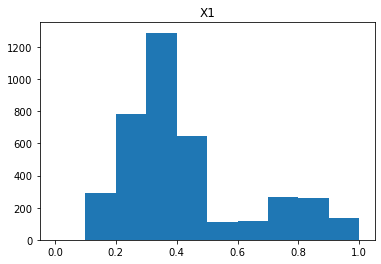

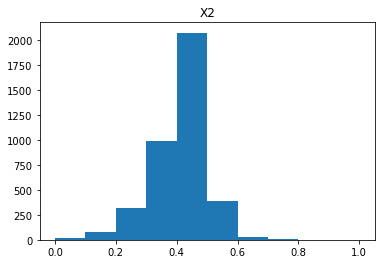

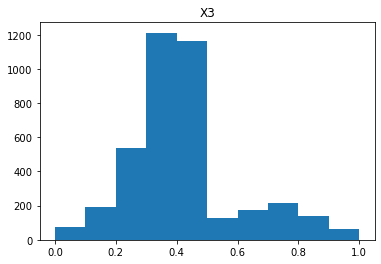

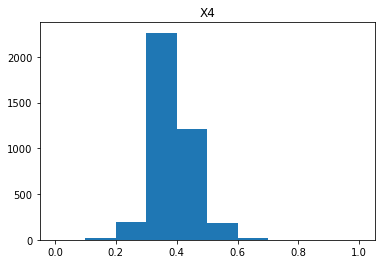

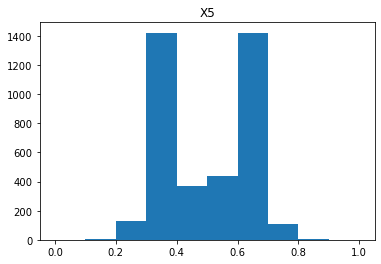

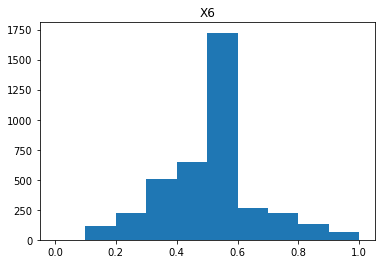

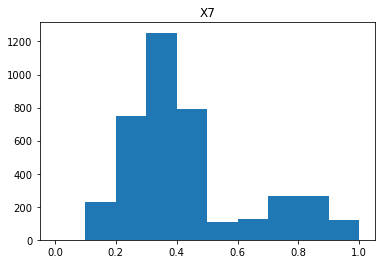

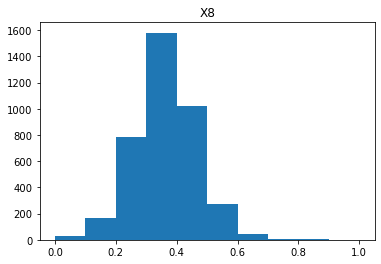

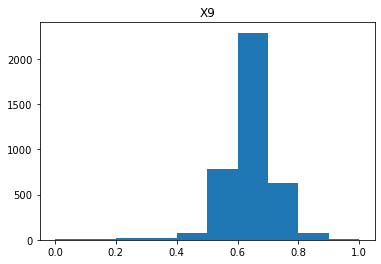

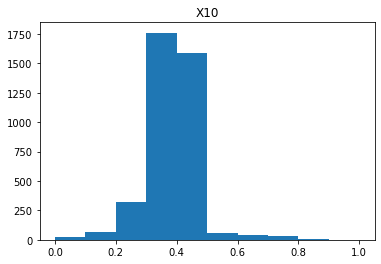

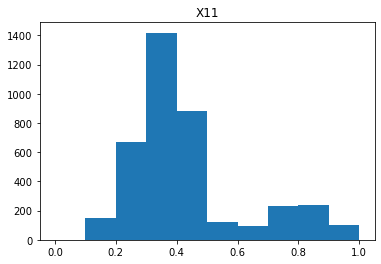

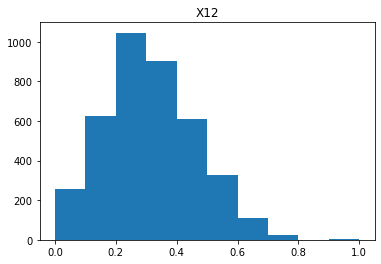

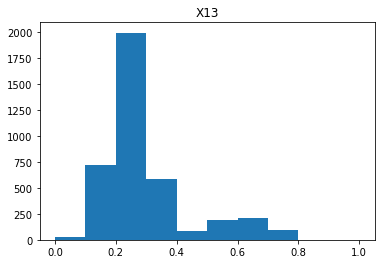

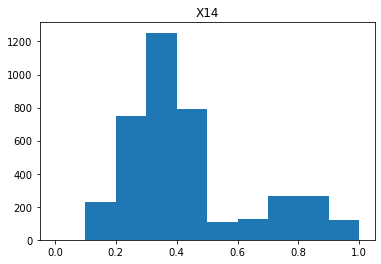

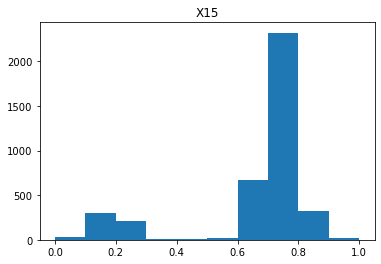

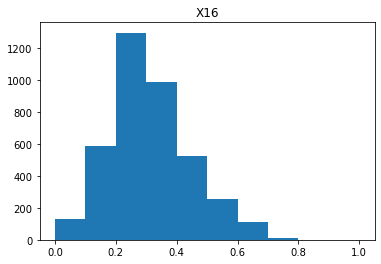

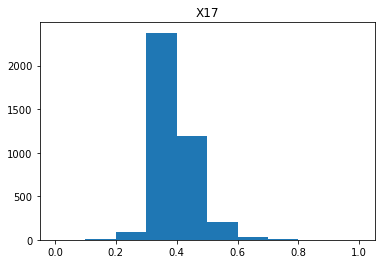

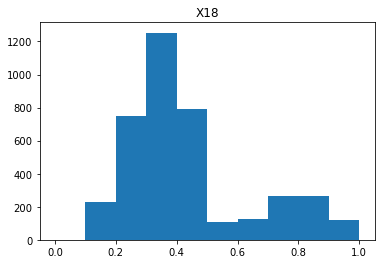

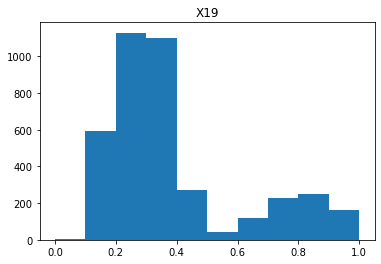

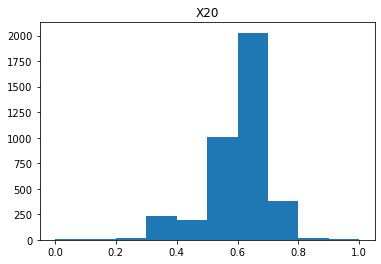

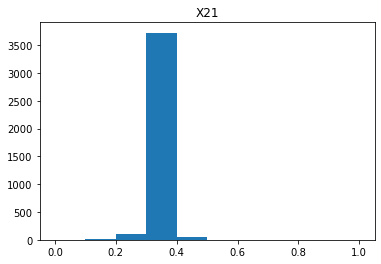

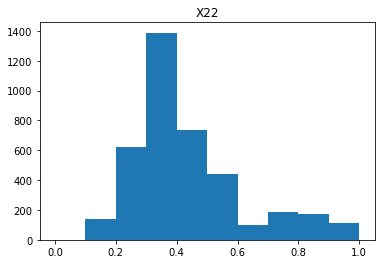

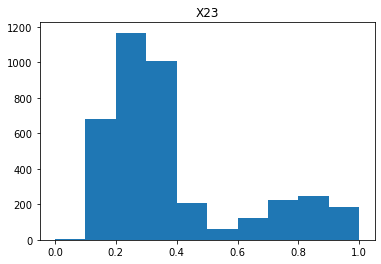

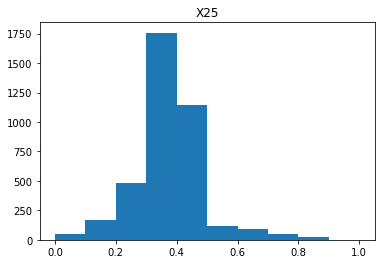

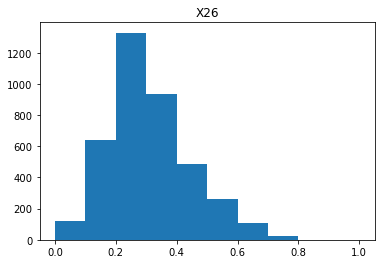

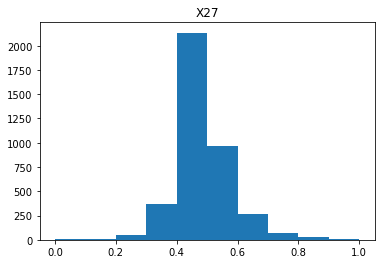

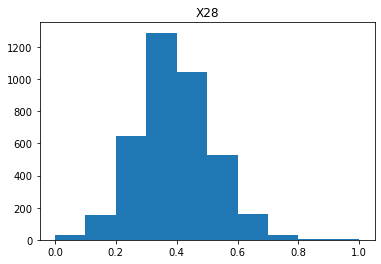

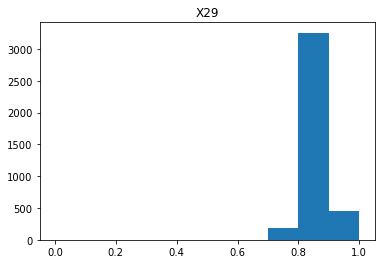

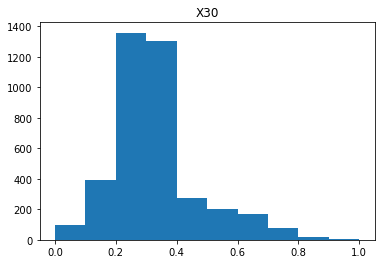

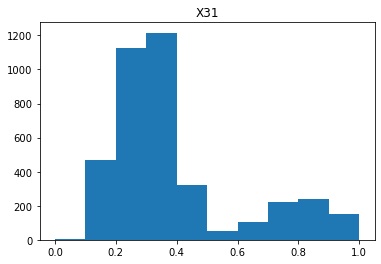

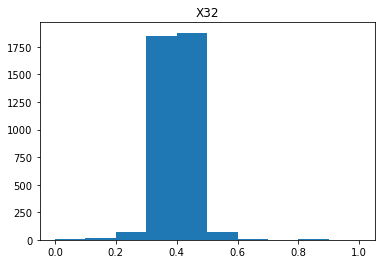

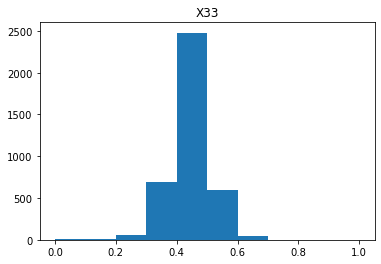

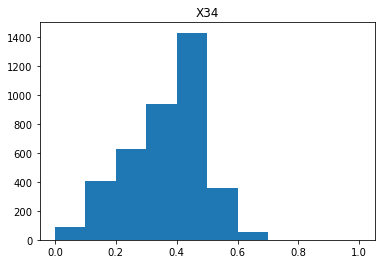

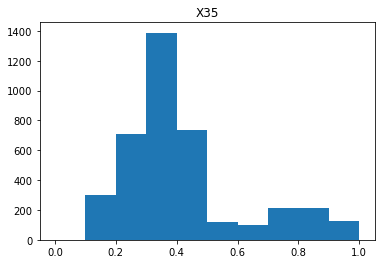

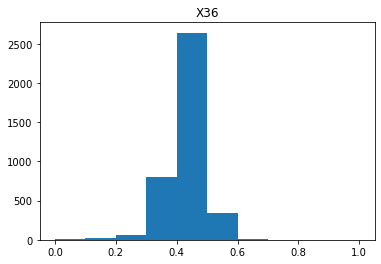

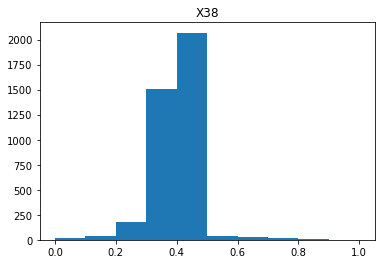

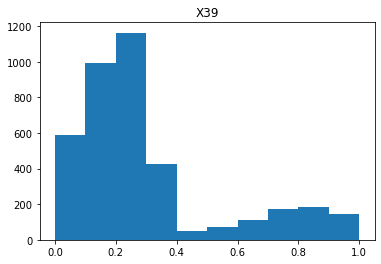

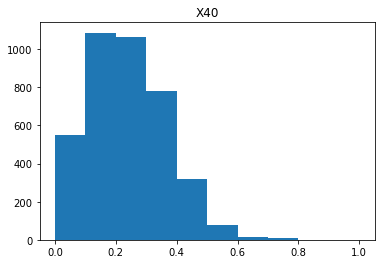

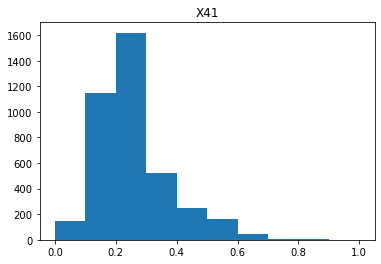

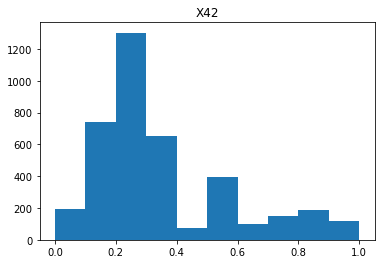

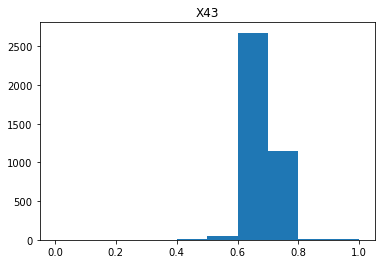

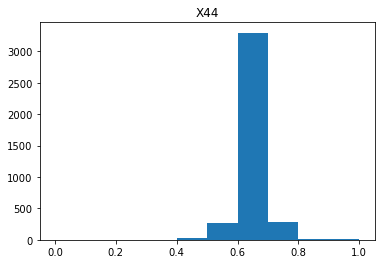

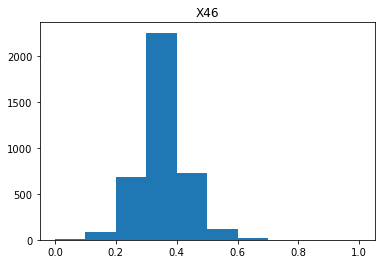

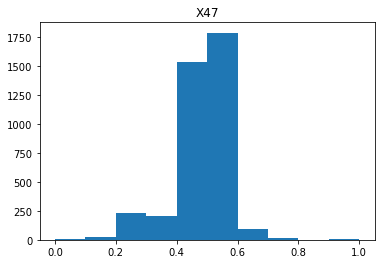

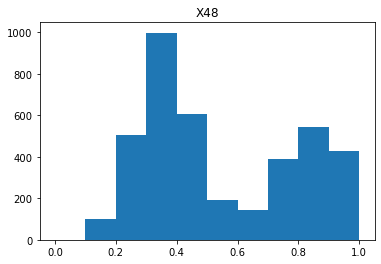

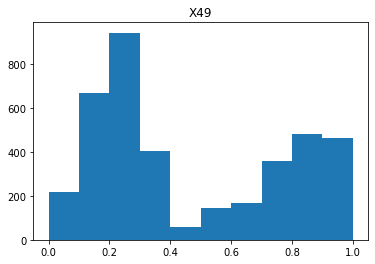

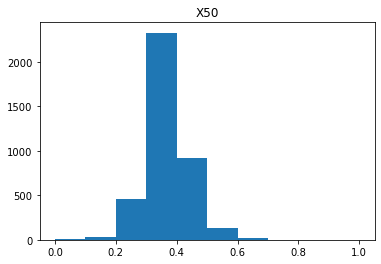

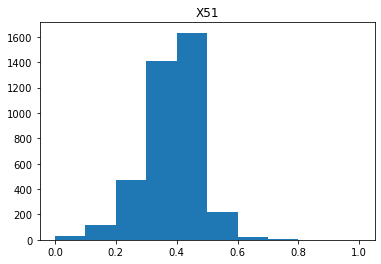

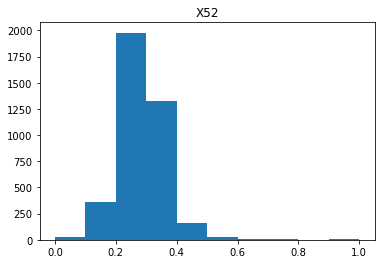

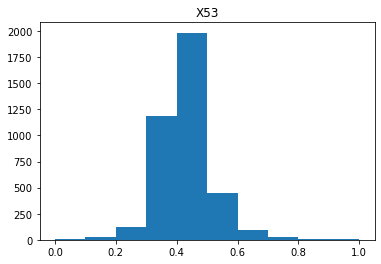

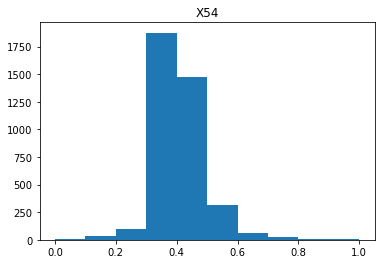

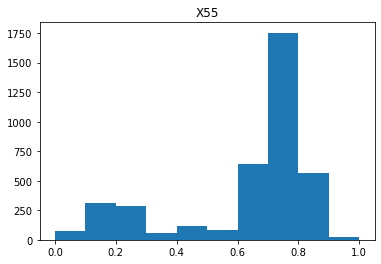

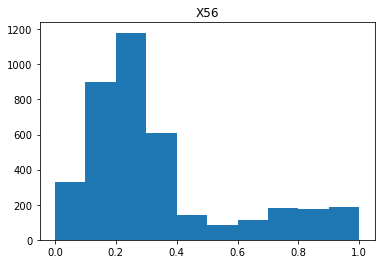

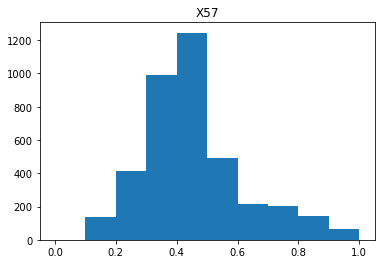

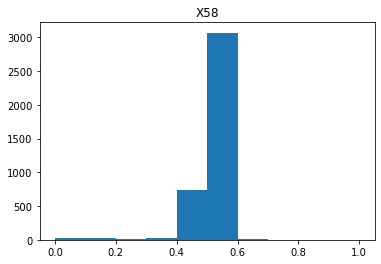

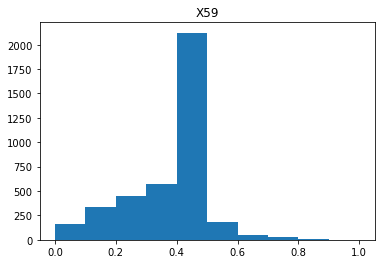

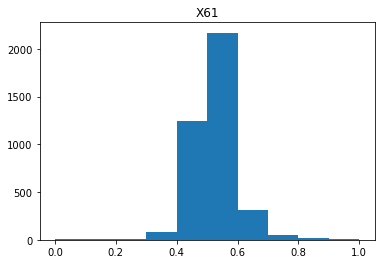

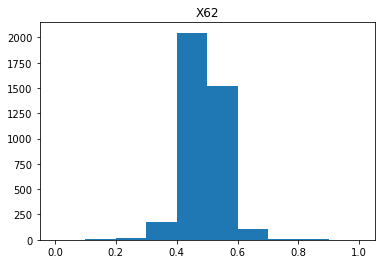

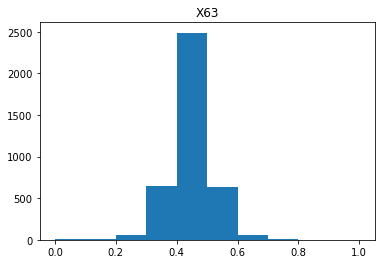

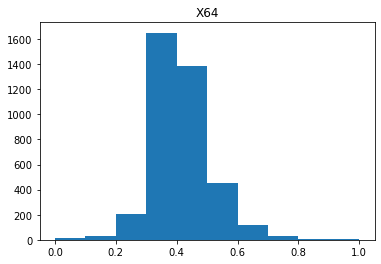

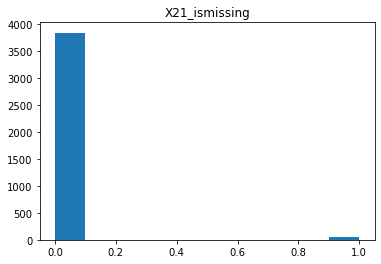

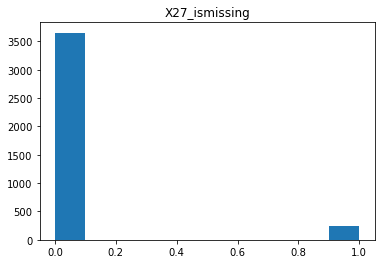

In [307]:
pd.set_option('display.max_columns', 70)
for i in X_training.columns:

    plt.figure()
    plt.title(i)
    plt.hist(X_training[i])

### Handling imbalance 

* We will use upsampling and downsampling

* upsampling will be done first to class 1
    * use 100% SMOTE 
    * DUplicate 100% sample of class 1
* After upsampling was done , the down sampling of class 0 will be applied:
    * reduced to number of observation in the upsampling methodology 

* Create SMOTE function that return 100% of dataset that putting in
* This function are from https://medium.com/@breya.heysoftware/synthetic-minority-over-sampling-technique-smote-from-scratch-e1167f788434



In [798]:
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import NearestNeighbors

def nearest_neighbour(X):
  nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
  euclidean,indices= nbs.kneighbors(X)
  return indices

def SMOTE_100(X):
  indices2 = nearest_neighbour(X)
  matrix=[]
  for m in range(len(indices2)):
    t=x1[indices2[m]]
    newt=pd.DataFrame(t)
    matrix.append([])
    for j in range(len(newt.columns)):
      matrix[m].append(random.choice(newt[j]))
  return matrix



In [799]:


# 1. Getting the number of Minority Class Instances in Training Set
unique, counts = np.unique(Y_val, return_counts=True)
minority_shape = dict(zip(unique, counts))[1]


# 2. Storing the minority class instances separately
x1 = np.ones((minority_shape, X_training.shape[1]))

x1=[X_training.iloc[i] for i, v in enumerate(Y_val.values.ravel()) if v==1.0]
x1=np.array(x1)
# 3. Applying 100% SMOTe
sampled_instances = SMOTE_100(x1)


# Keeping the artificial instances and original instances together
X_TrainSMOTE = np.concatenate((X_training,sampled_instances), axis = 0)

y_sampled_instances = np.ones(minority_shape)

y_TrainSMOTE = np.concatenate((Y_val.values.ravel(),y_sampled_instances), axis=0)

#X_TrainSMOTE and y_TrainSMOTE are the Training Set Features and Labels respectively

In [310]:
pd.DataFrame(sampled_instances , columns =X_training.columns).describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X38,X39,X40,X41,X42,X43,X44,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X61,X62,X63,X64,X21_ismissing,X27_ismissing
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.575857,0.484378,0.478564,0.337094,0.407576,0.547114,0.580072,0.327087,0.643268,0.370044,0.595883,0.378005,0.431860,0.573952,0.427520,0.376515,0.347921,0.575843,0.564669,0.593427,0.331258,0.588133,0.554201,0.390923,0.387146,0.430000,0.403585,0.849725,0.340843,0.578407,0.421890,0.416662,0.388545,0.582711,0.443117,0.394066,0.521225,0.150958,0.393583,0.537395,0.679655,0.641727,0.281405,0.468697,0.607266,0.549809,0.318405,0.445106,0.316074,0.400631,0.380612,0.435305,0.489433,0.529962,0.518366,0.436907,0.549001,0.527211,0.409061,0.421023,0.234310,0.301255
std,0.207805,0.079182,0.181701,0.077200,0.132634,0.134720,0.208283,0.088929,0.101847,0.090349,0.205950,0.141854,0.181612,0.209700,0.273462,0.147386,0.055705,0.200158,0.247865,0.112231,0.024564,0.204885,0.255698,0.137759,0.148863,0.084743,0.121917,0.040044,0.106403,0.253626,0.045842,0.064892,0.101993,0.191629,0.062657,0.101017,0.261885,0.121037,0.136832,0.265681,0.044519,0.052883,0.074805,0.082217,0.199069,0.266055,0.072320,0.086252,0.070916,0.083369,0.091843,0.264576,0.257588,0.148445,0.039322,0.112963,0.082141,0.063221,0.065323,0.097580,0.424455,0.459766
min,0.158402,0.233964,0.130766,0.026131,0.000000,0.000000,0.152679,0.061222,0.087495,0.140188,0.000000,0.020794,0.115555,0.000000,0.078393,0.022312,0.173560,0.161963,0.122593,0.083727,0.220011,0.179317,0.118642,0.113226,0.034541,0.217194,0.062163,0.587257,0.018160,0.145835,0.286309,0.057368,0.000000,0.137502,0.067949,0.077547,0.009120,0.000000,0.102221,0.061015,0.438576,0.382425,0.011187,0.232281,0.163048,0.044117,0.118707,0.107921,0.085551,0.000000,0.043076,0.028708,0.002605,0.146966,0.044931,0.073692,0.097395,0.327675,0.260745,0.052457,0.000000,0.000000
25%,0.379894,0.437035,0.341073,0.293005,0.323649,0.536044,0.394559,0.265651,0.587667,0.320262,0.411933,0.262003,0.235510,0.372692,0.200255,0.251127,0.323894,0.395259,0.307271,0.531653,0.315453,0.363485,0.286468,0.289627,0.257509,0.387047,0.326271,0.825010,0.285581,0.306979,0.400783,0.379274,0.353250,0.402742,0.411660,0.341986,0.232994,0.063066,0.270047,0.250466,0.656052,0.611781,0.244067,0.433681,0.414835,0.265295,0.269112,0.404709,0.276729,0.353253,0.326987,0.174605,0.251858,0.399448,0.511434,0.389563,0.508806,0.495810,0.368853,0.358392,0.000000,0.000000
50%,0.662960,0.481816,0.451241,0.342872,0.347018,0.536044,0.658961,0.335789,0.630016,0.364895,0.657566,0.430668,0.503580,0.652654,0.236197,0.426940,0.344446,0.648530,0.681337,0.619230,0.333505,0.662896,0.682596,0.373057,0.443259,0.422778,0.403181,0.855043,0.329703,0.686053,0.418611,0.421170,0.400584,0.646877,0.443527,0.386236,0.647674,0.115160,0.422886,0.660875,0.681195,0.645087,0.276802,0.487465,0.667426,0.667213,0.319905,0.444423,0.309102,0.389145,0.372183,0.373310,0.587474,0.546275,0.518723,0.476700,0.545952,0.521830,0.411417,0.398449,0.000000,0.000000
75%,0.733096,0.514663,0.625393,0.374424,0.467543,0.638498,0.737411,0.390569,0.708565,0.408609,0.735937,0.479879,0.586064,0.735143,0.736350,0.486922,0.372471,0.721443,0.754410,0.668486,0.347427,0.744845,0.762972,0.480908,0.502801,0.471034,0.4

In [802]:
len(sampled_instances)

239

#### The SMOTE generate similar data , that has similar chracteristic to class 1 acoording to distance
    * 239 sample generated
    * Now we have 239*2 = 478 sample which has class 1 
    * Now we will duplicated the record to have further sample
        * duplicated by *2 to be 478 *2 = 956
    * After we upsample class 1 to be 956 sample
        * we down sample of class 0 to be 956 too 
    * SO we have 1 : 956 , 0 :956 {total of 1912 samples}

In [348]:
n , count = np.unique(y_TrainSMOTE, return_counts=True)
count_class_0 = count[0]
count_class_1 = count[1]

# df_class_1 = pd.Series(y_TrainSMOTE[y_TrainSMOTE == 1])

df_class_1 = pd_smote[pd_smote["Bankrupt"]==1]["Bankrupt"]

df_class_1_over = df_class_1.sample(round(count_class_1 *2  ), replace=True)

#X_training_concat_1 =  pd.concat([df_class_0_under, pd_smote.loc[:, pd_smote.columns != 'Bankrupt']], axis=1, join='inner')

df_class_1_over_X = pd.merge(  df_class_1_over, pd_smote.loc[:, pd_smote.columns != 'Bankrupt'], left_index=True, right_index=True)


df_class_0 = pd_smote[(pd_smote.Bankrupt == 0)]

df_class_0_under = df_class_0.sample(round(df_class_1_over_X.shape[0] ), replace=False)

df_balanced = df_class_0_under.append(df_class_1_over_X)


In [353]:
y_train = df_balanced.loc[:,'Bankrupt']
X_train = df_balanced.loc[:, df_balanced.columns != 'Bankrupt']

# Apply the same transfromation to validation set and test set

In [30]:
validation_pre 

,Bankrupt,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4696,0,0.047164,0.38443,-0.023131,0.93983,-39.637,0.00000,0.059057,1.60120,1.14400,0.61557,0.059061,0.15362,0.107840,0.059057,1137.40,0.320920,2.6012,0.059057,0.051621,28.1710,1.01950,0.058484,0.041226,0.184730,0.54049,0.289980,12232.000000,-0.036216,3.7518,0.289190,0.051626,128.840,2.8329,2.832900,0.054989,1.14400,NaN,0.61557,0.048066,0.143030,0.104350,0.051121,97.729,69.559,0.53416,0.71015,29.5930,-0.005830,-0.005096,0.93983,0.38443,0.35300,0.96378,0.96378,-130.63,0.048066,0.076619,0.94865,0.000000,12.9570,5.2474,122.650,2.9759,1.79120
2967,0,0.197040,0.28502,0.442410,2.85460,44.768,0.00000,0.197040,2.50850,1.71460,0.71498,0.198980,0.82597,0.135600,0.197040,447.45,0.815730,3.5085,0.197040,0.114910,49.4560,1.10320,0.173560,0.114910,0.603670,0.23640,0.815730,89.294000,1.386700,4.0197,0.024531,0.116050,53.995,6.7598,5.657700,0.102080,1.71460,94.6460,0.71972,0.059535,1.077000,0.045453,0.101220,90.267,40.811,0.84810,1.88070,52.5870,0.138090,0.080537,2.38920,0.23855,0.14793,2.24100,2.25590,4629.30,0.059535,0.275580,0.89232,0.006630,7.3803,8.9436,50.781,7.1878,5.37440
3275,0,-0.098628,0.17815,0.215330,2.23170,126.730,-0.15821,-0.097002,4.58570,0.95189,0.81696,-0.097002,-0.55487,-0.055513,-0.097002,-2874.80,-0.126960,5.6132,-0.097002,-0.238070,79.8650,0.31588,-0.001942,-0.242060,-0.151200,0.81696,-0.136090,-0.045378,0.353080,4.2227,0.411700,-0.238070,149.070,2.4485,-0.010903,-0.001942,0.59191,90.3790,0.82029,-0.004767,0.069065,0.080852,-0.004767,338.680,258.810,-1.10630,1.72170,76.0230,-0.076326,-0.187320,2.19000,0.17482,0.40842,1.33960,1.34510,3596.20,-0.050541,-0.120730,1.05050,0.004077,4.5702,1.4103,156.610,2.3307,0.66812
2368,0,0.180330,0.58601,0.107120,1.24080,-18.461,0.00000,0.180330,0.70647,2.15890,0.41399,0.180960,0.40544,0.088171,0.180330,1123.60,0.324840,1.7065,0.180330,0.083527,31.3630,1.16350,0.000000,0.083527,0.493160,0.28907,0.324840,0.000000,0.239050,3.7363,0.262240,0.167050,92.020,3.9665,3.010600,0.016571,2.15890,2.5942,0.55523,0.007675,0.070621,1.948000,0.000000,87.996,56.633,0.97209,0.82377,38.3800,-0.010027,-0.004645,0.94179,0.44477,0.25211,0.92388,1.23910,583.72,0.182830,0.435580,0.81924,0.341150,11.6380,6.4450,75.196,4.8540,4.81790
1649,0,0.065701,0.26116,0.181920,2.26430,39.899,0.00000,0.067439,2.82900,0.55099,0.73884,0.084337,0.46869,0.177900,0.067439,972.49,0.375320,3.8290,0.067439,0.122400,34.2520,1.07810,0.080521,0.119240,0.310210,0.73686,0.368670,4.765100,0.269830,4.7054,0.449040,0.138260,110.840,3.2929,1.814200,0.077177,0.55099,2.4532,0.85057,0.140070,0.659090,0.078355,0.146140,153.010,118.750,1.27070,1.90500,39.8310,0.049939,0.090635,1.24750,0.14389,0.30368,1.09590,1.26160,9230.70,0.140070,0.088925,0.88087,0.151230,10.6560,3.0736,95.318,3.8293,0.81726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,0,0.110710,0.33258,0.363030,2.26630,17.802,0.22701,0.137830,1.72530,1.10760,0.57380,0.137830,0.48078,0.137790,0.137830,621.03,0.587730,3.0068,0.137830,0.097155,77.2310,1.35130,0.132980,0.078043,0.284550,0.57380,0.506210,1.038300,1.036300,4.3878,0.201680,0.097155,81.698,4.4677,0.399860,0.132980,1.44420,7.6141,0.61970,0.093742,0.170380,0.057359,0.093742,154.590,77.364,0.36884,1.21930,85.5450,0.075343,0.053110,1.95350,0.28667,0.22383,1.63800,1.76910,8866.60,0.097185,0.192950,0.90281,0.080003,4.7261,4.7180,73.758,4.9486,4.04970
5174,0,0.195200,0.34691,0.252830,1.83420,23.092,0.00000,0.245300,1.88260,2.81390,0.65309,0.257020,0.80935,0.119610,0.245300,376.21,0.970190,2.8826,0.2453

In [57]:
def apply_transformation(df_t):
    df_t = df_t.apply(pd.to_numeric , errors = 'coerce') 
    col_selected = [i for i in df_t.columns if i not in ["X24","X37","X45","X60","Bankrupt"]]
    X_val_test = df_t.loc[:, col_selected]
    Y_val_test = df_t.loc[:, ["Bankrupt"]]
    X_log_test = np.sign(X_val_test) * np.log(np.abs(X_val_test)+0.01)       
    X_test_dummy = None
    X_test_dummy = X_log_test.copy()
    
    X_test_dummy['X21_ismissing'] = np.where(X_log_test['X21'].isna(), 1, 0)
    X_test_dummy['X27_ismissing'] = np.where(X_log_test['X27'].isna(), 1, 0)
    X_test_dummy = X_test_dummy[['X21_ismissing','X27_ismissing']]
    X_log_test_scaled = pd.DataFrame(min_max_fit.transform(X_log_test),index=X_log_test.index,columns = X_log_test.columns)
    X_log_test_imputed = pd.DataFrame(knn_imputed_model.transform(X_log_test_scaled),index=X_log_test_scaled.index,columns = X_log_test_scaled.columns)
    
    X_test = pd.merge(  X_log_test_imputed, X_test_dummy, left_index=True, right_index=True)


    X_tran = X_test
    y_tran = Y_val_test
    
    return y_tran , X_tran 
    
    
    

In [58]:
y_validation , X_validation = apply_transformation(validation_pre)

<ipython-input-57-adcd6657c3ec>:6: RuntimeWarning: invalid value encountered in sign
  X_log_test = np.sign(X_val_test) * np.log(np.abs(X_val_test)+0.01)


In [59]:
y_test , X_test = apply_transformation(testing_pre)

<ipython-input-57-adcd6657c3ec>:6: RuntimeWarning: invalid value encountered in sign
  X_log_test = np.sign(X_val_test) * np.log(np.abs(X_val_test)+0.01)


In [61]:
y_train = y_train.values.ravel()
y_validation = y_validation.values.ravel()
y_test = y_test.values.ravel()

## Start Modeling 

* After we have done the feature preparation now its time to modeling
    * 4 model will be consider here
        1. Logistic regression with regularized parameter
        2. Support vector classifier 
        3. Gradient Boosting Machine 
        4. random forest classifier
    * Each Model will be tuning with validation set created before
    * The tuning will be based on custom metric 
        * since we interest the most with recall class 1 we will put more weight into that part
        ### custom_matric : cost = (1* accuracy) + (1* precision class1) + (2* recall class 1 ) /4
            - Tune to maximixe the custom matrix
        * After we have create 4 individual model, we will create ensemsble model
        * The ensemble model will combine the prediction of each of 4 individual model
        * To get the most generalized result!!
        * Finally the theashold will be investigate , and looking at the precision vs recall trade off

In [359]:
def myscores_class1(conf_mat): 
    tl = conf_mat[0][0] 
    tr = conf_mat[0][1] 
    bl = conf_mat[1][0] 
    br = conf_mat[1][1] 
    accucary = (tl+br)/np.sum(conf_mat)

    precision_1 = br/(br + tr)
    recall_1 = br/(br + bl)

    total_score = (accucary +  precision_1 + (recall_1*2))/4
    return total_score

### 1. Logistic regression
    *1.1 Tuning For L1 vs L2 penality
    *1.2 Tuning For C parameter
    *1.3 Feature important investigation
    *1.4 Prediction and scoring

In [360]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### 1.1 Tuning For l1 vs l2

LogisticRegression(C=1, penalty='l1', solver='liblinear')

LogisticRegression(C=1, solver='liblinear')

Text(0, 0.5, 'custom_score = acc + precision + 5* recall')

Text(0.5, 0, 'Penality')

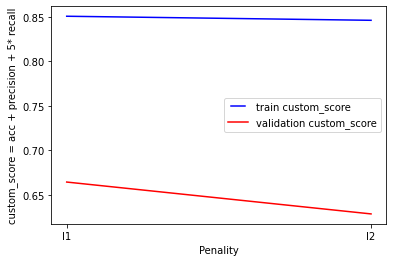

In [361]:
l_param = ['l1','l2']
train_results = []
validation_results = []
for eta in l_param:
   model = LogisticRegression(penalty=eta , C = 1 , solver = "liblinear")
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(l_param, train_results, 'b', label = "train custom_score")
line2, = plt.plot(l_param, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('Penality')
plt.show()

* l1 > l2

### 1.2 Tuning For C parameter with penalty = l1

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

<ipython-input-359-a0f2584d1584>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = br/(br + tr)
<ipython-input-359-a0f2584d1584>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_1 = br/(br + tr)


LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

LogisticRegression(C=0.05, penalty='l1', solver='liblinear')

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

LogisticRegression(C=1, penalty='l1', solver='liblinear')

LogisticRegression(C=5, penalty='l1', solver='liblinear')

LogisticRegression(C=8, penalty='l1', solver='liblinear')

LogisticRegression(C=10, penalty='l1', solver='liblinear')

LogisticRegression(C=12, penalty='l1', solver='liblinear')

LogisticRegression(C=15, penalty='l1', solver='liblinear')

Text(0, 0.5, 'custom_score = acc + precision + 5* recall')

Text(0.5, 0, 'C')

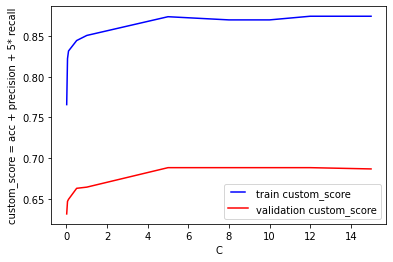

In [362]:
C_param = [0.001,0.01,0.05,0.1,0.5,1,5, 8,10,12, 15]
# ,10,50,100,200,400
train_results = []
validation_results = []
for eta in C_param:
   model = LogisticRegression(C=eta , solver = "liblinear" , penalty = 'l1' )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(C_param, train_results, 'b', label = "train custom_score")
line2, = plt.plot(C_param, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall/4')
plt.xlabel('C')
plt.show()

* l1 , C = 5 are the best

### 1.3 Logistic regression important parameter

In [364]:
logistic_mod = LogisticRegression(solver = "liblinear" ,
                                  C=5,
                                  penalty='l1')
logistic_fit = logistic_mod.fit(X_train, y_train)

In [374]:
logistic_fit.coef_

array([[  0.9722367 ,   0.        ,  -3.81745056,   7.1586615 ,
         -0.81954005,   0.1798576 ,   0.53748348,  -3.25455519,
          6.19849353,   0.        ,   4.09808665,   2.41318296,
         -2.04484565,  -5.72409846,  -3.34439623,  -0.22489686,
         -5.80452103,   0.97522723,   1.53649037,   0.        ,
        -27.0405117 ,  -0.71354618,   0.        ,   2.23089507,
         -1.48332097,  -2.24611069,   6.55146311,   0.        ,
          2.26132994,  -2.5763015 ,   4.63227322,  10.73648782,
          0.41121051,   5.95674106,   0.        ,   0.        ,
         -1.0645206 ,  -1.04659636,   1.08921227,   0.40358767,
          3.45412776,  -1.56950099,  -9.75026272,   0.        ,
         -0.14908908,  -0.99748423,  -0.68481074,   1.51382103,
          4.3733941 ,   0.53060187,   1.64266113,  -0.92682465,
         -1.77055336,  -1.15966824,  -1.31300047,   0.79326527,
          4.7670746 ,   0.        ,  -1.82291229,  -6.40300692,
          7.90177956,   3.69146358]])

In [808]:
X_train.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43',
       'X44', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54',
       'X55', 'X56', 'X57', 'X58', 'X59', 'X61', 'X62', 'X63', 'X64',
       'X21_ismissing', 'X27_ismissing'],
      dtype='object')

Feature: 0, Score: 0.97224
Feature: 1, Score: 0.00000
Feature: 2, Score: -3.81745
Feature: 3, Score: 7.15866
Feature: 4, Score: -0.81954
Feature: 5, Score: 0.17986
Feature: 6, Score: 0.53748
Feature: 7, Score: -3.25456
Feature: 8, Score: 6.19849
Feature: 9, Score: 0.00000
Feature: 10, Score: 4.09809
Feature: 11, Score: 2.41318
Feature: 12, Score: -2.04485
Feature: 13, Score: -5.72410
Feature: 14, Score: -3.34440
Feature: 15, Score: -0.22490
Feature: 16, Score: -5.80452
Feature: 17, Score: 0.97523
Feature: 18, Score: 1.53649
Feature: 19, Score: 0.00000
Feature: 20, Score: -27.04051
Feature: 21, Score: -0.71355
Feature: 22, Score: 0.00000
Feature: 23, Score: 2.23090
Feature: 24, Score: -1.48332
Feature: 25, Score: -2.24611
Feature: 26, Score: 6.55146
Feature: 27, Score: 0.00000
Feature: 28, Score: 2.26133
Feature: 29, Score: -2.57630
Feature: 30, Score: 4.63227
Feature: 31, Score: 10.73649
Feature: 32, Score: 0.41121
Feature: 33, Score: 5.95674
Feature: 34, Score: 0.00000
Feature: 35, Sc

<BarContainer object of 62 artists>

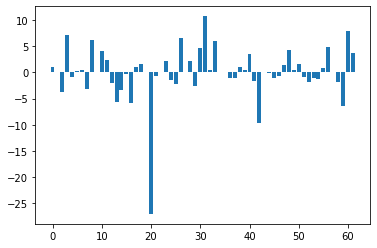

In [375]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

importance = logistic_fit.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [811]:
# top 2 for each side
importance_indices = [20,31,42,60]
X_train.columns[importance_indices]

Index(['X21', 'X33', 'X46', 'X21_ismissing'], dtype='object')

#### From the feature important

* We can see the potential feature that has prediction power
X21 sales (n) / sales (n-1) (sale growth) 
X33 operating expenses / short-term liabilities
X46 (current assets - inventory) / short-term liabilities
X21_ismissing


For X21 : Negative power 
        * MAKE SENSE!! , due to company that has higher sales growth usually be on the growth side not declined side

For X46 : Positive power 
        * MAKE SENSE!! , if the company that has huge expense , 
          however but credit so they cannot issue the short term debt to pay their expense thus go bankrupt
        
For X33 : negative power 
        * MAKE SENSE!! , higher cash to pay the short term debt thus not bankrupt
          
For X21_ismissing : Positive power 
        * MAKE SENSE!! , This one we investigate before making the model, the reason might be the company 
         tend to avoid report their sale growth when the company has big problem

### 1.4 prediction + score

In [369]:
from sklearn.metrics import accuracy_score

score_in_sample = None
y_pred_train = logistic_fit.predict(X_train)
y_pred_valid = logistic_fit.predict(X_validation)

In [370]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_train , y_pred_train )
conf_mat


array([[853, 103],
       [131, 825]], dtype=int64)

In [371]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_validation , y_pred_valid )
conf_mat


array([[346,  55],
       [  7,  26]], dtype=int64)

In [372]:
myscores(conf_mat) 

accuracy : 0.857
precision_0 : 0.98
recall_0 : 0.863
avg_0 : 0.922
precision_1 : 0.321
recall_1 : 0.788
avg_1 : 0.554
avg_of_avg : 0.738


In [373]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_valid ))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       401
           1       0.32      0.79      0.46        33

    accuracy                           0.86       434
   macro avg       0.65      0.83      0.69       434
weighted avg       0.93      0.86      0.88       434



### Overall model has big increase in recall and precision of class1 compare to simple model 
    * We continue making model further

## 2th Second model is SVC 
    * tuning for C , gamma , and kernel

### Tune for kernel

SVC()

SVC(kernel='linear')

SVC(kernel='sigmoid')

SVC(kernel='poly')

Text(0, 0.5, 'custom_score = acc + precision + 5* recall')

Text(0.5, 0, 'Gamma')

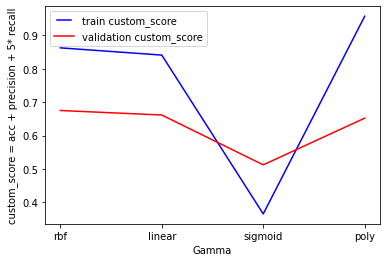

In [421]:
from sklearn.svm import SVC  
kernel_list = ['rbf' ,'linear' ,'sigmoid' , 'poly' ]
# ,1,2,4,8

train_results = []
validation_results = []
for eta in kernel_list:
   model = SVC(kernel = eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(kernel_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(kernel_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 5* recall')
plt.xlabel('Gamma')
plt.show()

### deffault rbf is the best

### 2.1 Tune for C

SVC(C=0.001)

SVC(C=0.01)

SVC(C=0.05)

SVC(C=0.1)

SVC(C=0.5)

SVC(C=1)

SVC(C=2)

SVC(C=5)

SVC(C=10)

SVC(C=20)

SVC(C=40)

Text(0, 0.5, 'custom_score = acc + precision + 2* recall / 4')

Text(0.5, 0, 'C')

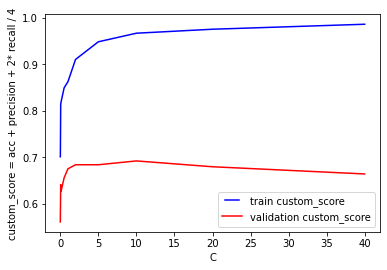

In [376]:
from sklearn.svm import SVC  
C_param = [0.001,0.01,0.05,0.1,0.5,1,2,5,10,20,40]
train_results = []
validation_results = []
for eta in C_param:
   model = SVC(C=eta , kernel = 'rbf')
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(C_param, train_results, 'b', label = "train custom_score")
line2, = plt.plot(C_param, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('C')
plt.show()

* C = 10 best

### 1.2 Tune for gamma

SVC(C=10, gamma=0.001)

SVC(C=10, gamma=0.01)

SVC(C=10, gamma=0.05)

SVC(C=10, gamma=0.1)

SVC(C=10, gamma=0.5)

SVC(C=10, gamma=1)

SVC(C=10, gamma=2)

SVC(C=10, gamma=4)

SVC(C=10, gamma=8)

SVC(C=10, gamma=16)

SVC(C=10, gamma=32)

SVC(C=10, gamma=64)

SVC(C=10, gamma=128)

Text(0, 0.5, 'custom_score = acc + precision + 5* recall')

Text(0.5, 0, 'Gamma')

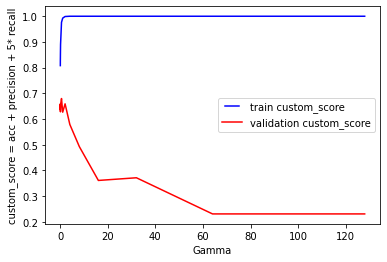

In [385]:
from sklearn.svm import SVC  
gamma = [0.001,0.005, 0.01,0.05 ,0.1,0.5 ,1,2,4,8,16 ,32,64,128]
# ,1,2,4,8

train_results = []
validation_results = []
for eta in gamma:
   model = SVC(gamma=eta , kernel = 'rbf' , C = 10)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(gamma, train_results, 'b', label = "train custom_score")
line2, = plt.plot(gamma, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 5* recall')
plt.xlabel('Gamma')
plt.show()

SVC(C=10, gamma=0.001)

SVC(C=10, gamma=0.005)

SVC(C=10, gamma=0.01)

SVC(C=10, gamma=0.05)

Text(0, 0.5, 'custom_score = acc + precision + 5* recall')

Text(0.5, 0, 'Gamma')

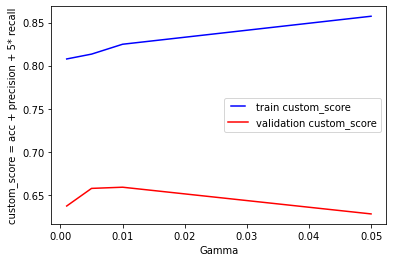

In [378]:
from sklearn.svm import SVC  
gamma = [0.001,0.005 ,0.01,0.05 ]
# ,1,2,4,8

train_results = []
validation_results = []
for eta in gamma:
   model = SVC(gamma=eta , kernel = 'rbf' , C = 10)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(gamma, train_results, 'b', label = "train custom_score")
line2, = plt.plot(gamma, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 5* recall')
plt.xlabel('Gamma')
plt.show()

### Gamma = 0.005 , C= 10 Best

### 1.3 Prediction and scoring

In [494]:
svm_mod = SVC(C= 10, gamma= 0.005, kernel= 'rbf' ,  probability=True)
svm_fit = svm_mod.fit(X_train,y_train)

In [495]:
y_pred_train = svm_fit.predict(X_train)
y_pred_valid = svm_fit.predict(X_validation)


In [412]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_train , y_pred_train )
conf_mat


array([[822, 134],
       [201, 755]], dtype=int64)

In [413]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_validation , y_pred_valid )
conf_mat


array([[337,  64],
       [  8,  25]], dtype=int64)

In [393]:
myscores(conf_mat) 

accuracy : 0.924
precision_0 : 0.928
recall_0 : 0.995
avg_0 : 0.961
precision_1 : 0.5
recall_1 : 0.061
avg_1 : 0.28
avg_of_avg : 0.621


In [388]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred_valid ))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       401
           1       0.28      0.76      0.41        33

    accuracy                           0.83       434
   macro avg       0.63      0.80      0.66       434
weighted avg       0.92      0.83      0.87       434



#### The SVM model has result quite similar to the logistic model , however the precision is not good

# 3rd model tree based :GBM Gradiant Boosting Machine
    *Tune for 5 hyperparameter below sequentially

### 3.1 tune min split

GradientBoostingClassifier(min_samples_split=0.01)

GradientBoostingClassifier(min_samples_split=0.1)

GradientBoostingClassifier(min_samples_split=0.2)

GradientBoostingClassifier(min_samples_split=0.3)

GradientBoostingClassifier(min_samples_split=0.4)

GradientBoostingClassifier(min_samples_split=0.5)

GradientBoostingClassifier(min_samples_split=0.6)

GradientBoostingClassifier(min_samples_split=0.7)

GradientBoostingClassifier(min_samples_split=0.8)

GradientBoostingClassifier(min_samples_split=0.9)

Text(0, 0.5, 'custom_score = acc + precision + 2* recall / 4')

Text(0.5, 0, 'min_samples_split')

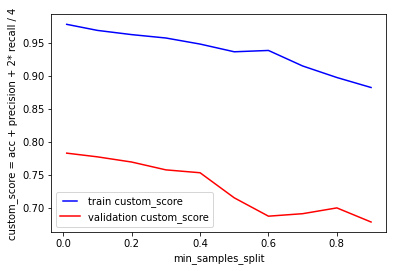

In [590]:
from sklearn.ensemble import GradientBoostingClassifier
min_samples_split_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9 ]

train_results = []
validation_results = []
for eta in min_samples_split_list:
   model = GradientBoostingClassifier(min_samples_split =eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_split_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(min_samples_split_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('min_samples_split')
plt.show()

* 0.01 is the best  min_samples_split

### 3.2 Tune for max_features

GradientBoostingClassifier(max_features=3, min_samples_split=0.01)

GradientBoostingClassifier(max_features=5, min_samples_split=0.01)

GradientBoostingClassifier(max_features=7, min_samples_split=0.01)

GradientBoostingClassifier(max_features=9, min_samples_split=0.01)

GradientBoostingClassifier(max_features=11, min_samples_split=0.01)

GradientBoostingClassifier(max_features=15, min_samples_split=0.01)

GradientBoostingClassifier(max_features=19, min_samples_split=0.01)

GradientBoostingClassifier(max_features=21, min_samples_split=0.01)

GradientBoostingClassifier(max_features=25, min_samples_split=0.01)

GradientBoostingClassifier(max_features=29, min_samples_split=0.01)

GradientBoostingClassifier(max_features=35, min_samples_split=0.01)

GradientBoostingClassifier(max_features=40, min_samples_split=0.01)

Text(0, 0.5, 'custom_score = acc + precision + 2* recall / 4')

Text(0.5, 0, 'max_features_list')

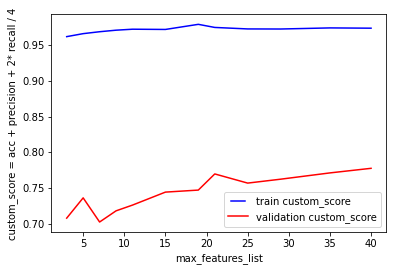

In [594]:
from sklearn.ensemble import GradientBoostingClassifier
max_features_list = [3,5,7,9,11,15,19,21,25,29,35,40]

train_results = []
validation_results = []
for eta in max_features_list:
   model = GradientBoostingClassifier(min_samples_split = 0.01 ,max_features=eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(max_features_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('max_features_list')
plt.show()




* min_samples_split = 0.01 ,max_features = 21 , 

### 3.3 Tune for Learning rate

GradientBoostingClassifier(learning_rate=0.01, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.05, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(max_features=21, min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.5, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.7, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=1, max_features=21,
                           min_samples_split=0.01)

Text(0, 0.5, 'custom_score = acc + precision + 2* recall / 4')

Text(0.5, 0, 'learning_rate_list')

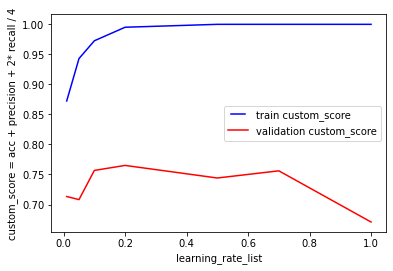

In [595]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rate_list = [0.01,0.05,0.1,0.2,0.5,0.7,1]

train_results = []
validation_results = []
for eta in learning_rate_list:
   model = GradientBoostingClassifier(min_samples_split = 0.01 ,max_features = 21  ,learning_rate =eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rate_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(learning_rate_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('learning_rate_list')
plt.show()


* min_samples_split = 0.01 ,max_features = 21 ,learning_rate = 0.2

### 3.4 Tune for the max depth

GradientBoostingClassifier(learning_rate=0.2, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=9, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=11, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=15, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=19, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=23, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=25, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=35, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=40, max_features=21,
                           min_samples_split=0.01)

Text(0, 0.5, 'custom_score = acc + precision + 2* recall / 4')

Text(0.5, 0, 'max_depth_list')

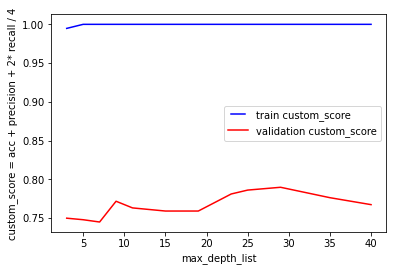

In [596]:
from sklearn.ensemble import GradientBoostingClassifier
max_depth_list = [3,5,7,9,11,15,19,23,25,29,35,40]

train_results = []
validation_results = []
for eta in max_depth_list:
   model = GradientBoostingClassifier(min_samples_split = 0.01 ,max_features = 21 ,learning_rate = 0.2 , max_depth =eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(max_depth_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('max_depth_list')
plt.show()


### 3.5 Tune for n_estimator

* min_samples_split = 0.01 ,max_features = 21 ,learning_rate = 0.2 , max_depth = 29

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=3)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=5)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=10)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=15)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=20)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=30)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=40)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=50)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=60)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=70)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=80)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=90)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=125)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=150)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=175)

GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21,
                           min_samples_split=0.01, n_estimators=200)

Text(0, 0.5, 'custom_score = acc + precision + 2* recall / 4')

Text(0.5, 0, 'n_estimators_list')

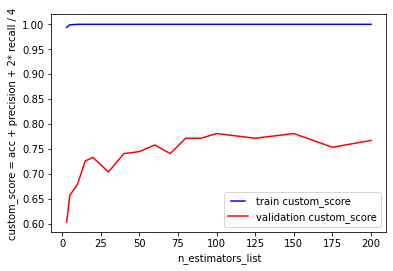

In [598]:
from sklearn.ensemble import GradientBoostingClassifier
n_estimators_list = [3,5,10,15,20,30,40,50,60,70,80,90,100, 125,150,175,200]

train_results = []
validation_results = []
for eta in n_estimators_list:
   model = GradientBoostingClassifier(min_samples_split = 0.01 ,max_features = 21 ,learning_rate = 0.2 , max_depth = 29 ,n_estimators=eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(n_estimators_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('n_estimators_list')
plt.show()

* learning_rate=0.2, max_depth=29, max_features=21, min_samples_split=0.01, n_estimators = 100

### 3.6 Prediction and scoring

In [600]:
gbm = GradientBoostingClassifier(learning_rate=0.2, max_depth=29, max_features=21, min_samples_split=0.01, n_estimators = 100)
gbm_mod = gbm.fit(X_train,y_train)

In [429]:
y_pred_train = gbm_mod.predict(X_train)
y_pred_valid = gbm_mod.predict(X_validation)

In [602]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_train , y_pred_train )
conf_mat

array([[822, 134],
       [201, 755]], dtype=int64)

In [603]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_validation , y_pred_valid )
conf_mat


array([[385,  16],
       [  8,  25]], dtype=int64)

In [604]:
myscores(conf_mat) 

accuracy : 0.945
precision_0 : 0.98
recall_0 : 0.96
avg_0 : 0.97
precision_1 : 0.61
recall_1 : 0.758
avg_1 : 0.684
avg_of_avg : 0.827


### GBM model has quite improvment over SVM and logistic and big improvement over simple model

## 4th model random forest
    * Tune for max_depth
    * Tune max_features
    * Tune min_samples_split
    * Tune min_weight_fraction_leaf

### 4.1 Max depth tuning

RandomForestClassifier()

RandomForestClassifier(min_samples_split=4)

RandomForestClassifier(min_samples_split=6)

RandomForestClassifier(min_samples_split=8)

RandomForestClassifier(min_samples_split=12)

RandomForestClassifier(min_samples_split=16)

Text(0, 0.5, 'custom_score = acc + precision + 2* recall / 4')

Text(0.5, 0, 'min_samples_split_list')

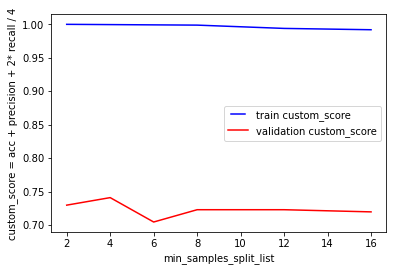

In [605]:
from sklearn.ensemble import RandomForestClassifier
min_samples_split_list = [2,4,6,8,12,16]

train_results = []
validation_results = []
for eta in min_samples_split_list:
   model = RandomForestClassifier(min_samples_split=eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_split_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(min_samples_split_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('min_samples_split_list')
plt.show()

* min_samples_split = 4

### 4.2 min_weight_fraction_leaf tuning

RandomForestClassifier(min_samples_split=4, min_weight_fraction_leaf=0)

RandomForestClassifier(min_samples_split=4, min_weight_fraction_leaf=0.1)

RandomForestClassifier(min_samples_split=4, min_weight_fraction_leaf=0.2)

RandomForestClassifier(min_samples_split=4, min_weight_fraction_leaf=0.3)

RandomForestClassifier(min_samples_split=4, min_weight_fraction_leaf=0.4)

RandomForestClassifier(min_samples_split=4, min_weight_fraction_leaf=0.5)

Text(0, 0.5, 'custom_score = acc + precision + 2* recall / 4')

Text(0.5, 0, 'min_weight_fraction_leaf_list')

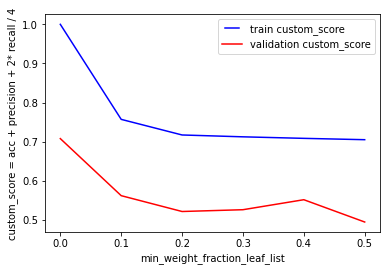

In [607]:
from sklearn.ensemble import RandomForestClassifier
min_weight_fraction_leaf_list = [0,0.1,0.2,0.3,0.4,0.5]

train_results = []
validation_results = []
for eta in min_weight_fraction_leaf_list:
   model = RandomForestClassifier(min_samples_split=4, min_weight_fraction_leaf =eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_weight_fraction_leaf_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(min_weight_fraction_leaf_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('min_weight_fraction_leaf_list')
plt.show()

* min_samples_split=4, min_weight_fraction_leaf=0

### 4.3 Tune for max_depth

RandomForestClassifier(max_depth=3, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=5, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=7, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=9, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=11, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=15, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=19, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=25, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=29, min_samples_split=4,
                       min_weight_fraction_leaf=0)

Text(0, 0.5, 'custom_score = acc + precision + 2* recall / 4')

Text(0.5, 0, 'max_depth_list')

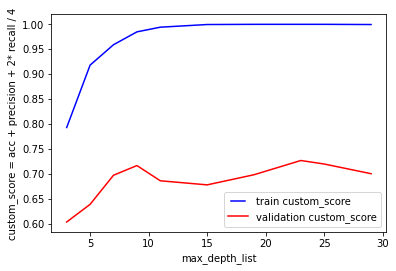

In [609]:
from sklearn.ensemble import RandomForestClassifier
max_depth_list = [3,5,7,9,11,15,19,23,25,29]

train_results = []
validation_results = []
for eta in max_depth_list:
   model = RandomForestClassifier(min_samples_split=4, min_weight_fraction_leaf =0 , max_depth =eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(max_depth_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('max_depth_list')
plt.show()

* max_depth=23, min_samples_split=4,min_weight_fraction_leaf=0

### 4.4 tune for max feature 

RandomForestClassifier(max_depth=23, max_features=3, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=5, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=7, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=9, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=11, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=15, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=19, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=23, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=29, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=33, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=39, min_samples_split=4,
                       min_weight_fraction_leaf=0)

RandomForestClassifier(max_depth=23, max_features=45, min_samples_split=4,
                       min_weight_fraction_leaf=0)

Text(0, 0.5, 'custom_score = acc + precision + 5* recall / 7')

Text(0.5, 0, 'max_features_list')

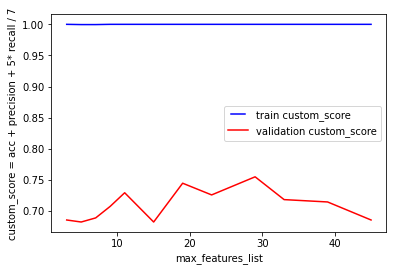

In [610]:
from sklearn.ensemble import RandomForestClassifier
max_features_list = [3,5,7,9,11,15,19,23,29,33,39,45]

train_results = []
validation_results = []
for eta in max_features_list:
   model = RandomForestClassifier(max_depth=23, min_samples_split=4,min_weight_fraction_leaf=0 , max_features = eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(max_features_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('max_features_list')
plt.show()

* max_depth=23, max_features=29, min_samples_split=4, min_weight_fraction_leaf=0

### 4.5 tune for n_estimator

RandomForestClassifier(max_depth=23, max_features=29, min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=51)

RandomForestClassifier(max_depth=23, max_features=29, min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=75)

RandomForestClassifier(max_depth=23, max_features=29, min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=101)

RandomForestClassifier(max_depth=23, max_features=29, min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=125)

RandomForestClassifier(max_depth=23, max_features=29, min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=151)

RandomForestClassifier(max_depth=23, max_features=29, min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=171)

RandomForestClassifier(max_depth=23, max_features=29, min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=201)

Text(0, 0.5, 'custom_score = acc + precision + 2* recall / 4')

Text(0.5, 0, 'n_estimators_list')

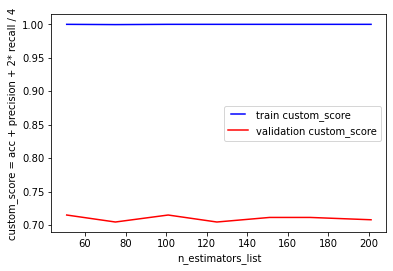

In [612]:
from sklearn.ensemble import RandomForestClassifier
n_estimators_list = [51,75,101,125,151,171,201]

train_results = []
validation_results = []
for eta in n_estimators_list:
   model = RandomForestClassifier(max_depth=23, min_samples_split=4,min_weight_fraction_leaf=0 , max_features = 29 ,n_estimators= eta )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(n_estimators_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc + precision + 2* recall / 4')
plt.xlabel('n_estimators_list')
plt.show()

* max_depth=23, max_features=29, min_samples_split=4, min_weight_fraction_leaf=0, n_estimators=101

### 4.6 Prediction and scoring

In [613]:
rf = RandomForestClassifier(max_depth=23, max_features=29, min_samples_split=4, min_weight_fraction_leaf=0, n_estimators=101)
rf_fit = rf.fit(X_train,y_train)


In [614]:
y_pred_train = rf_fit.predict(X_train)
y_pred_valid = rf_fit.predict(X_validation)

In [615]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_train , y_pred_train )
conf_mat


array([[955,   1],
       [  0, 956]], dtype=int64)

In [616]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_validation , y_pred_valid )
conf_mat

array([[379,  22],
       [ 10,  23]], dtype=int64)

In [617]:
myscores(conf_mat) 

accuracy : 0.926
precision_0 : 0.974
recall_0 : 0.945
avg_0 : 0.96
precision_1 : 0.511
recall_1 : 0.697
avg_1 : 0.604
avg_of_avg : 0.782


## 5TH ensemble model
    * we will combine the prediction from 4 of other model
    * To help prevent Overfitting problem
    * Combined by probabaility

* defined the generic cut off that will be used

In [ ]:
# model object

# svm_fit.predict(X_validation)
# gbm_mod.predict(X_validation)
# logistic_fit.predict(X_validation)
# rf_fit.predict(X_validation)


## Predict proba for both train and validaiton set

In [564]:
y_pred_svm_p = svm_fit.predict_proba(X_validation)
y_pred_gbm_p = gbm_mod.predict_proba(X_validation)
y_pred_logis_p = logistic_fit.predict_proba(X_validation)
y_pred_rf_p = rf_fit.predict_proba(X_validation)


y_pred_svm_p_train = svm_fit.predict_proba(X_train)
y_pred_gbm_p_train = gbm_mod.predict_proba(X_train)
y_pred_logis_p_train = logistic_fit.predict_proba(X_train)
y_pred_rf_p_train = rf_fit.predict_proba(X_train)



In [618]:
Y_pred_prob_avg_train = ((y_pred_svm_p_train[:,1] +  y_pred_gbm_p_train[:,1] + y_pred_logis_p_train[:,1] + y_pred_rf_p_train[:,1])/4)

In [619]:
Y_pred_prob_avg_valid = ((y_pred_svm_p[:,1] +  y_pred_gbm_p[:,1] + y_pred_logis_p[:,1] + y_pred_rf_p[:,1])/4)

## Look at the precision and recall trade off on the cut off

In [667]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, Y_pred_prob_p_all)

# Convert thresholds (log odds) to probability
probs = np.exp(thresholds)/(1+np.exp(thresholds))

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, probs=None):
    fig, ax = plt.subplots(1,1, figsize=(24,10))
    
    if probs is None:
        horiz = thresholds
        label = "Threshold"
    else:
        horiz = probs
        label = "Probability threshold"
    _ = ax.plot(horiz, precisions[:-1], "b--", label="Precision", linewidth=2)
    _ = ax.plot(horiz, recalls[:-1], "g-", label="Recall", linewidth=2)
    _ = ax.set_xlabel(label, fontsize=16)
    _ = ax.legend(loc="upper left", fontsize=16)
    _ = ax.set_ylim([0, 1])
    
    _ = ax.set_xlim([ horiz.min(), horiz.max()])
    
    return fig, ax

fig, ax = plot_precision_recall_vs_threshold(precisions, recalls, thresholds, probs=probs)
plt.close(fig)

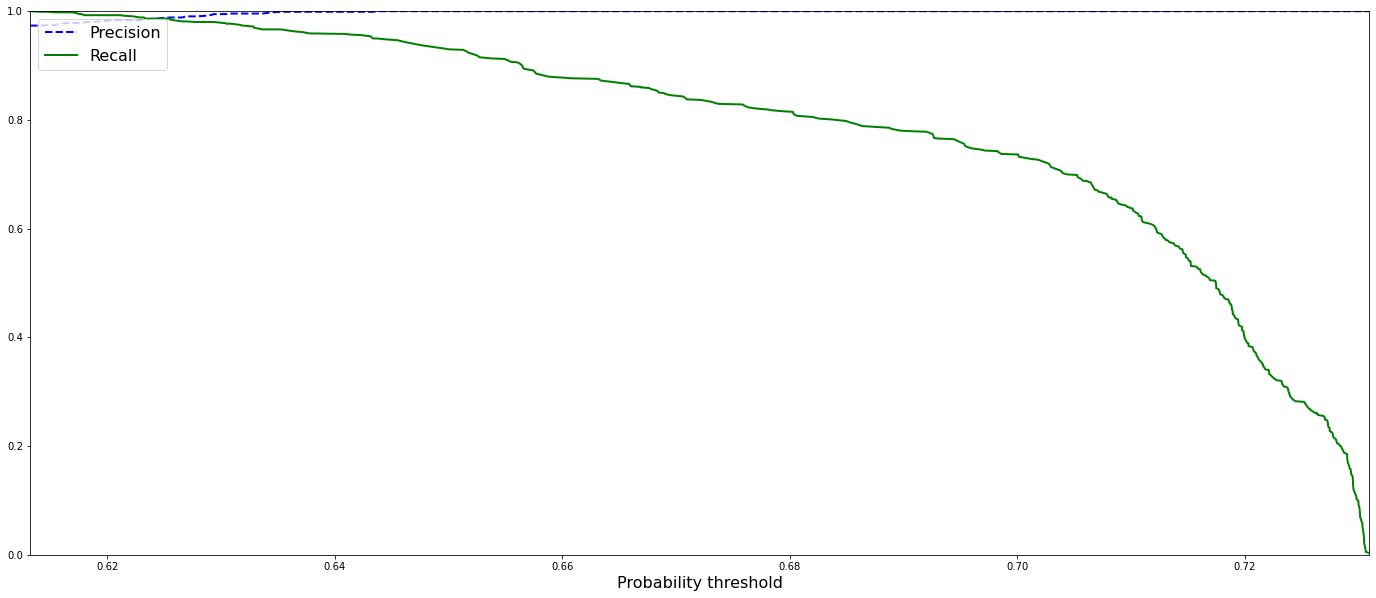

In [668]:
fig

####  the optimal cut off will be around 0.61

## We create the final prediction , predict 1 , when prob >= 0.63 , 0 otherwise

In [772]:
y_pred_avg_train = np.where(Y_pred_prob_avg_train>= 0.63 ,1,0)

In [773]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_train , y_pred_avg_train )
conf_mat

array([[956,   0],
       [ 78, 878]], dtype=int64)

In [774]:
y_pred_avg_valid = np.where(Y_pred_prob_avg_valid>0.63 ,1,0)

In [775]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix( y_validation , y_pred_avg_valid )
conf_mat

array([[390,  11],
       [  9,  24]], dtype=int64)

In [776]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,y_pred_avg_valid))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       401
           1       0.69      0.73      0.71        33

    accuracy                           0.95       434
   macro avg       0.83      0.85      0.84       434
weighted avg       0.96      0.95      0.95       434



## 6th Save model

In [ ]:

######################################
######################################
# Save MODEL
######################################
######################################



import pickle


pkl_filename = "randomforest_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_fit, file)


    
pkl_filename = "svm_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svm_fit, file)
    

    
pkl_filename = "logistic_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(logistic_fit, file)
    
    
pkl_filename = "gbm_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(gbm_mod, file)

    
pkl_filename = "knn_impute_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_imputed_model, file)
    
    
pkl_filename = "min_max_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(min_max_fit, file)



In [31]:

######################################
######################################
# load Model
######################################
######################################
    
    
import pickle
# Load from file
with open("randomforest_model.pkl", 'rb') as file:
    randomforest_model = pickle.load(file)
    
with open("svm_model.pkl", 'rb') as file:
    svm_model = pickle.load(file)

with open("logistic_model.pkl", 'rb') as file:
    logistic_model = pickle.load(file)
    
with open("gbm_model.pkl", 'rb') as file:
    gbm_model = pickle.load(file)
    
with open("knn_impute_model.pkl", 'rb') as file:
    knn_impute_model = pickle.load(file)
    
with open("min_max_model.pkl", 'rb') as file:
    min_max_model_model = pickle.load(file)
    


## DONE for modeling

In [712]:
import pickle

In [ ]:
df_for_test = holdout_data.set_index('Id')
data_id = df_for_test
df = data_id.apply(pd.to_numeric , errors = 'coerce')
label = df['Bankrupt']
raw_features = df.loc[:, df.columns != 'Bankrupt']

## Test Predicted

In [723]:
y_pred_svm_p_test = svm_fit.predict_proba(X_test)
y_pred_gbm_p_test = gbm_mod.predict_proba(X_test)
y_pred_logis_p_test = logistic_fit.predict_proba(X_test)
y_pred_rf_p_test = rf_fit.predict_proba(X_test)

In [724]:
Y_pred_prob_avg_test = ((y_pred_svm_p_test[:,1] +  y_pred_gbm_p_test[:,1] + y_pred_logis_p_test[:,1] + y_pred_rf_p_test[:,1])/4)

In [789]:
y_pred_avg_test = np.where(Y_pred_prob_avg_test>0.63 ,1,0)

In [790]:
conf_mat = confusion_matrix( y_test , y_pred_avg_test )
conf_mat

array([[432,  14],
       [ 11,  25]], dtype=int64)

In [791]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_avg_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       446
           1       0.64      0.69      0.67        36

    accuracy                           0.95       482
   macro avg       0.81      0.83      0.82       482
weighted avg       0.95      0.95      0.95       482



In [796]:
from sklearn.metrics import recall_score , precision_score
accuracy_test = accuracy_score(y_test, y_pred_avg_test)
recall_test = recall_score(y_test, y_pred_avg_test, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_pred_avg_test, pos_label=1, average="binary")

print(" Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

 Accuracy: 94.8%, Recall 69.4%, Precision 64.1%


### This are the result of final prediction on the testing dataset

# CONCLUSION

For the methodology we have done the following step

1. Split the train ,test ,validation set 
    * We will not look at test set until the last past of section .
    * The exploration , preperation , and model train will be based on training dataset.
    * The validation set will used for tuning and evaluted the model that we train.
2. Create the most simple model
    * We impute the missing by mean imputation
    * We train the simpliest model :logistic regression with default parameter
        * We get pretty bad result in confusion matrix , bad precision/recall for class 1 
        * we investigate the causation 
    * The causation of the model being bad
        1. The distribution has minor skewed data that lead to big outlier problem
            - This happen to many features 
            - We correct this by taking the log(x +0.01) to make the skewness look much smoother
                -AND IT IS!!
            - The smoother curve should be benefit for model like logistic regression
        2. The missing value , there are some characteristic of missing value 
            - X21 X27 have big insight of whether the company will be bankrupt or not
                - if they are missing , most likely to be bankrupt 
                - We create the dummy variable for each of 2 column indicate 1 when the feature is missing, 0 Otherwise 
            - 4 of the columns has way to many missing value
                - One of them miss 50% of total dataset
                - So we delete these 4 columns out 
            - We have impute the missing value for remaining column by different way : KNNimpute
                - Use the machine learning model to impute (require scaler) 
                - Involve using various featuure to predict missing value 
        3. The Imbalance dataset , there are 14-15 times of class 0 more than class1 
            - simple model predict only class 0 : due to majority dominant 
            - We correct by 
                1. Upsampling
                    1.1 SMOTE : not using imbalearn, up the sample according to the distance , up by 100% of class 1
                    1.2 After SMOTE : we duplicate the sample further 
                        , so that we have 200% of smote result and 400% of origianl class 1
                    1.3 After Smote and up sampling , we do the down sampling for class 0
                        Down so that we have the same size as class 1 
3. Create 4 Model and consequentially tuning the result, by custom metric
    * The custom metric we consider is : Custom = (1* accuracy + 1*precision_class_1 + 2*recall_class1)/4
    * So that we have more weight in the recall class 1 as the instruction indicate before 
    1. 1st model is regularizied logistic regression (which is basic model to start) 
        - We tune for C parameter and penalty L1 vs L2 
        - It turn out that the C=5, penalty='l1' are the best hyperparameter
        - The accuracy precision recall class 1 improve overall compare to simple model. 
    2. 2nd model is Support vector machine classifier
        - We tune for C parameter, gamma , kernel
        - It turn out that the C=10 ,gamma = 0.005 , kernel = 'rbf are the best hyperparameter
        - The accuracy precision recall class 1 improve overall compare to simple model.
    3. 3rd model is Gradient Boosting Machine Classifier
        - We tune for learning_rate , n_estimators , max_features , min_samples_split , min_weight_fraction_leaf
        - It turn out that the learning_rate=0.2, max_depth=29, max_features=21, n_estimators = 100 are the best hyperparameter
        - The accuracy precision recall class 1 improve overall compare to simple model and 2 of the previous model.      
    4. 4th model is Randomforest classifier model
        - We tune for learning_rate , n_estimators , max_features , min_samples_split , min_weight_fraction_leaf
        - It turn out that the max_depth=23, max_features=29, min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=101 are the best hyperparameter
        - The accuracy precision recall class 1 improve overall compare to simple model , SVM , Logistic regression 
            however some of the metric are worse than Gradient boosting machine.   
    5. We combine the 4 of above model, by averaging the prediction probability of each model
        - The result will be more gneeralized to the new model (less overfit) 
        - Then we check whether which probablity theashold is the best by looking at the precision vs recall trade off
        - using probability > 0.63 is the most optimized one for our ensemble average model
4. After we combine of the model together , we use the predict the testing set data
        - The result of the predict are not the best , 94% accuracy around 65 precision , 70 recall for class1 
        - However , this prediction are much more important than predict only class 1 , 
                eventhough we have the about the same accruacry, the recall and precision are much higher 
5. We gather all of the preperation and the model and save into my model (by reading the model object) 
          and we can use the predict holdout data further####

In [84]:
print("Done")

Done
